In [1]:
import sys
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import warnings
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 

# Suppressing PerformanceWarnings
warnings.filterwarnings("ignore", message="DataFrame is highly fragmented")
# Suppress runtime warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
df2 = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/my_boreholesA.csv", low_memory=False)
df2

,date_34/32,34/32,date_219/3,219/3,date_228/52,228/52,date_229/278,229/278,date_229/285,229/285,...,date_524/51,524/51,date_524/82,524/82,date_524/83,524/83,date_532/153,532/153,date_532/75,532/75
0,02/01/2015,348.9,01/03/1979,71.21,11/01/2007,71.61,20/02/2009,72.96,24/01/2020,80.93,...,30/01/1996,236.73,10/10/2000,240.48,10/10/2000,233.89,10/10/2000,150.59,01/10/2000,146.31
1,31/01/2015,349.0,01/06/1979,53.04,09/02/2007,71.72,20/03/2009,72.66,17/02/2020,81.05,...,06/03/1996,238.57,15/11/2000,240.60,15/11/2000,235.20,16/11/2000,152.33,15/10/2000,146.33
2,28/02/2015,348.5,01/08/1979,51.90,07/03/2007,71.90,20/04/2009,72.31,17/03/2020,81.02,...,20/11/1996,241.35,19/12/2000,240.79,20/12/2000,235.70,20/12/2000,153.18,01/11/2000,146.32
3,01/04/2015,320.7,01/10/1979,54.56,19/04/2007,71.34,18/05/2009,71.84,20/04/2020,81.15,...,15/01/1997,242.81,18/01/2001,242.58,18/01/2001,238.35,18/01/2001,154.77,15/11/2000,146.31
4,01/05/2015,349.0,01/03/1980,57.54,14/05/2007,71.29,17/06/2009,70.65,18/05/2020,81.08,...,30/04/1997,242.35,15/02/2001,242.34,15/02/2001,239.78,15/02/2001,155.11,01/12/2000,146.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<details><summary>Click here for the plot plot of water level</summary>

def wte_plot(df, index):
    col1 = df.columns[(index - 0) * 2]
    col2 = df.columns[(index - 0) * 2 + 1]
    
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Drop rows with missing values in the current pair of columns
    df.dropna(subset=[col1, col2], inplace=True)

    # Convert the date column to datetime format
    df[col1] = pd.to_datetime(df[col1], format='%d/%m/%Y')

    # Extract x and y data
    x = df[col1]
    y = df[col2].astype(float)

    # Set major locator for x-axis (every 500 days)
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=300))

    # Plot the data
    plt.plot(x, y)

    # Add labels and show the plot
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Water Level', fontsize=15)
    plt.title(f'Plot of {col2} against {col1}', fontsize=15)
    plt.show()

wte_plot(df, 1)

</details>

In [4]:
def consecutive_pair(df, idx):
    
    # Determine the correct columns for the given borehole index
    col1 = df.columns[(idx - 0) * 2]
    col2 = df.columns[(idx - 0) * 2 + 1]
    
    # Initialize an empty list to collect rows that meet the condition
    rows = []
    # Iterate through each pair of consecutive elements
    for i in range(len(df) - 1):
        first_date = pd.to_datetime(df[col1].iloc[i], format = '%d/%m/%Y' )
        second_date = pd.to_datetime(df[col1].iloc[i + 1], format = '%d/%m/%Y')
        first_val = df[col2].iloc[i]
        second_val = df[col2].iloc[i + 1]

        #computing level and time difference 
        Delta_Y = second_val - first_val
        Delta_T = (second_date - first_date).days 
        DecRate =  Delta_Y/Delta_T
        if first_val > second_val:
            rows.append({'Val1': first_val, 'Val2': second_val, 'Date1': first_date, 'Date2': second_date, 'DeltaY': Delta_Y, 'DeltaT': Delta_T, 'DecRate': DecRate})

    # Create the new DataFrame from the collected rows
    df1 = pd.DataFrame(rows)
    return df1
df3 = consecutive_pair(df2, 0)
#df3.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/consec_pair.csv", index=False)
df3

,Val1,Val2,Date1,Date2,DeltaY,DeltaT,DecRate
0,349.00,348.50,2015-01-31,2015-02-28,-0.50,28,-0.017857
1,348.50,320.70,2015-02-28,2015-04-01,-27.80,32,-0.868750
2,349.00,348.90,2015-05-01,2015-06-01,-0.10,31,-0.003226
3,348.90,348.80,2015-06-01,2015-07-01,-0.10,30,-0.003333
4,348.80,348.00,2015-07-01,2015-08-03,-0.80,33,-0.024242
5,348.00,322.60,2015-08-03,2015-11-02,-25.40,91,-0.279121
6,350.40,349.90,2016-05-30,2016-06-30,-0.50,31,-0.016129
7,349.90,333.00,2016-06-30,2016-09-07,-16.90,69,-0.244928
8,350.05,349.80,2016-10-06,2016-11-10,-0.25,35,-0.007143
9,350.05,350.00,2016-12-19,2017-01-16,-0.05,28,-0.001786


In [5]:
# Loading data
#precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/all_raingauges.csv")
bh_sy = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/borehole_specific_yield.csv")

used_pairs = []  # Global list to keep track of used matching pairs

def consecutive_pair(df, idx):
    try:
        col1 = df.columns[(idx - 0) * 2]
        col2 = df.columns[(idx - 0) * 2 + 1]
    except IndexError:
        print("Index out of range. Please check the provided index.")
        return pd.DataFrame()
        
    rows = []
    for i in range(len(df) - 1):
        try:
            first_date = pd.to_datetime(df[col1].iloc[i], format='%d/%m/%Y')
            second_date = pd.to_datetime(df[col1].iloc[i + 1], format='%d/%m/%Y')
        except ValueError as e:
            print(f' Date conversion error: {e}')
            continue
        
        first_val = df[col2].iloc[i]
        second_val = df[col2].iloc[i + 1]

        Delta_Y = second_val - first_val
        Delta_T = (second_date - first_date).days
        if Delta_T == 0:
            continue
            
        DecRate = Delta_Y / Delta_T
        if first_val > second_val:
            rows.append({
                'Val1': first_val, 'Val2': second_val, 'Date1': first_date, 
                'Date2': second_date, 'DeltaY': Delta_Y, 'DeltaT': Delta_T, 'DecRate': DecRate
            })

    df1 = pd.DataFrame(rows)
    return df1

def compute_slope_intercept(df):
    if df.empty:
        print('Empty DataFrame provided.')
        return None, None
    
    x = pd.to_numeric(df['Val1'].values)
    y = pd.to_numeric(df['DecRate'].values)

    n = np.size(x)
    if n < 2:
        print('Not enough data points to compute slope and intercept.')
        return None, None
        
    x_mean = np.mean(x) 
    y_mean = np.mean(y) 
    
    Sxy = np.sum(x * y) - n * x_mean * y_mean 
    Sxx = np.sum(x * x) - n * x_mean * x_mean
    
    b1 = Sxy / Sxx 
    b0 = y_mean - b1 * x_mean

    return b1, b0

def compute_MRC_slope_PredZ(df):
    b1, b0 = compute_slope_intercept(df)
    if b1 is None or b0 is None:
        return df
    
    df['MRC_slope'] = df['Val1'] * b1 + b0
    df['PredZ'] = df['Val1'] + df['DeltaT'] * df['MRC_slope']
    
    return df

def compute_fluc_sy(df, bh_sy, borehole_name):
    df['fluc'] = df['Val2'] - df['PredZ']
    filter_row = bh_sy[bh_sy['borehole'] == borehole_name]
    if not filter_row.empty:
        borehole_sy = filter_row['sy'].iloc[0]
        df['fluc_sy'] = borehole_sy * df['fluc'] * 1000
    else:
        print(f"No specific yield found for borehole {borehole_name}")
        df['fluc_sy'] = None
    return df

'''
def first_last_date(df, precip_all):
    raingauges = [col[len('date_'):] for col in precip_all.columns if col.startswith('date_')]
    
    if pd.api.types.is_datetime64_any_dtype(df['Date1']):
        df['Date1'] = df['Date1'].dt.to_period('M')
    if pd.api.types.is_datetime64_any_dtype(df['Date2']):
        df['Date2'] = df['Date2'].dt.to_period('M')

    first_min_date = df['Date1'].iloc[0].to_timestamp().strftime('%d/%m/%Y')
    last_max_date = df['Date2'].iloc[-1].to_timestamp().strftime('%d/%m/%Y')

    return first_min_date, last_max_date

def select_first_matching_pair(precip_all, first_min_date, last_max_date, used_pairs):
    matching_pairs = []
    for i in range(0, len(precip_all.columns), 2):
        date_col = precip_all.columns[i]
        prep_col = precip_all.columns[i + 1]

        precip_all[date_col] = pd.to_datetime(precip_all[date_col], format='%d/%m/%Y', errors='coerce')

        valid_dates = precip_all[date_col].dropna()

        if any(first_min_date == date_val.strftime('%d/%m/%Y') for date_val in valid_dates) and \
           any(last_max_date == date_val.strftime('%d/%m/%Y') for date_val in valid_dates):
            matching_pairs.append((date_col, prep_col))

    for pair in matching_pairs:
        if pair not in used_pairs:
            used_pairs.append(pair)
            date_col, prep_col = pair
            date_series = precip_all[date_col]
            prec_series = precip_all[prep_col]
    
            precip_df = pd.DataFrame({
                'date': date_series,
                'precip': prec_series,
            })
    
            return precip_df

    for pair in matching_pairs:
        date_col, prep_col = pair
        date_series = precip_all[date_col]
        prec_series = precip_all[prep_col]
    
        if any(first_min_date == date_val.strftime('%d/%m/%Y') for date_val in date_series.dropna()) and \
            any(last_max_date == date_val.strftime('%d/%m/%Y') for date_val in date_series.dropna()):
    
            precip_df = pd.DataFrame({
                'date': date_series,
                'precip': prec_series,
            })
    
            return precip_df
                
    return None

def sum_precip(df, precip_df):
    df['precip_sum'] = 0.0

    for index, row in df.iterrows():
        min_date = row['Date1']
        max_date = row['Date2']

        mask = (precip_df['date'].dt.to_period('M') >= min_date) & (precip_df['date'].dt.to_period('M') <= max_date)
        valid_precip = precip_df.loc[mask, 'precip']
        
        df.at[index, 'precip_sum'] = float(valid_precip.sum())
    
    return df

def Recharge_coefficient(df):
    df['Recharge_coefficient'] = df['fluc_sy'] / df['precip_sum']
    return df

def avg_recharge_coefficient(df):
    mask = df['Recharge_coefficient'].between(0, 1)
    filtered_df = df[mask]
    
    if not filtered_df.empty:
        av_rech_co = filtered_df['Recharge_coefficient'].mean()
        return av_rech_co
    return None'''

def process_borehole(df, idx, bh_sy):
    try:
        borehole_names = [col[len('date_'):] for col in df.columns if col.startswith('date_')]
        borehole_name_idx = idx 
        borehole_name = borehole_names[borehole_name_idx]
        
        consec_pair = consecutive_pair(df, idx)
        if consec_pair.empty:
            return borehole_name, None
    
        slope_intercept = compute_slope_intercept(consec_pair)
        if slope_intercept == (None, None):
            return borehole_name, None
    
        MRC_gen_slope = compute_MRC_slope_PredZ(consec_pair)
        fluc_sy = compute_fluc_sy(MRC_gen_slope, bh_sy, borehole_name)
        return borehole_name, fluc_sy
        '''first_min_date, last_max_date = first_last_date(fluc_sy, precip_all)
        precip_df = select_first_matching_pair(precip_all, first_min_date, last_max_date, used_pairs)
        if precip_df is not None:
            precip_sum = sum_precip(fluc_sy, precip_df)
            Rech_co = Recharge_coefficient(precip_sum)
            avg_rech_co = avg_recharge_coefficient(Rech_co)
            
            return borehole_name, precip_sum
        else:
            return borehole_name, None'''
        

    except Exception as e:
        print(f"Error processing Borehole {borehole_name} - {e}")
        return borehole_name, None
        
'''results = []
for idx in range(148):
    result = process_borehole(df2, idx, bh_sy, used_pairs)
    results.append(result)

    # Overwrite each output in the same line
    sys.stdout.write(f"\rProcessing borehole {idx + 1}/148")
    sys.stdout.flush()
    
    # Optional: Add a small delay to see the progress (remove in the actual implementation)
    time.sleep

print("\nAll boreholes processed.")'''

# Filter out Data

# Example to print the first borehole's dataframe
borehole_name, fluc_sy = process_borehole(df2, 0, bh_sy)
borehole_name, fluc_sy

('34/32',
       Val1    Val2      Date1      Date2  DeltaY  DeltaT   DecRate  MRC_slope  \
 0   349.00  348.50 2015-01-31 2015-02-28   -0.50      28 -0.017857  -0.126158   
 1   348.50  320.70 2015-02-28 2015-04-01  -27.80      32 -0.868750  -0.169605   
 2   349.00  348.90 2015-05-01 2015-06-01   -0.10      31 -0.003226  -0.126158   
 3   348.90  348.80 2015-06-01 2015-07-01   -0.10      30 -0.003333  -0.134847   
 4   348.80  348.00 2015-07-01 2015-08-03   -0.80      33 -0.024242  -0.143537   
 5   348.00  322.60 2015-08-03 2015-11-02  -25.40      91 -0.279121  -0.213053   
 6   350.40  349.90 2016-05-30 2016-06-30   -0.50      31 -0.016129  -0.004504   
 7   349.90  333.00 2016-06-30 2016-09-07  -16.90      69 -0.244928  -0.047952   
 8   350.05  349.80 2016-10-06 2016-11-10   -0.25      35 -0.007143  -0.034917   
 9   350.05  350.00 2016-12-19 2017-01-16   -0.05      28 -0.001786  -0.034917   
 10  350.15  350.05 2017-04-19 2017-05-22   -0.10      33 -0.003030  -0.026228   
 11  3

In [6]:
# Initialize an empty list to store results
results = []
# Loop through and process each borehole
for idx in range(148):
    borehole_name, fluc_sy = process_borehole(df2, idx, bh_sy)

    if fluc_sy is not None:  # Check if precip_sum is not None
        fluc_sy['borehole_name'] = borehole_name  # Add a column for borehole name
        results.append(fluc_sy)

    
    # Overwrite each output in the same line
    sys.stdout.write(f"\rProcessing borehole {idx + 1}/148")
    sys.stdout.flush()

print("\nAll boreholes processed.")

# Combine the individual borehole dataframes into the main dataframe
combined_df = pd.concat(results, ignore_index=True)

# Print the combined dataframe
print(combined_df)

Processing borehole 81/148Not enough data points to compute slope and intercept.
Processing borehole 82/148Not enough data points to compute slope and intercept.
Processing borehole 92/148Not enough data points to compute slope and intercept.
Processing borehole 131/148Not enough data points to compute slope and intercept.
Processing borehole 138/148Not enough data points to compute slope and intercept.
Processing borehole 148/148
All boreholes processed.
         Val1    Val2      Date1      Date2  DeltaY  DeltaT   DecRate  \
0      349.00  348.50 2015-01-31 2015-02-28   -0.50      28 -0.017857   
1      348.50  320.70 2015-02-28 2015-04-01  -27.80      32 -0.868750   
2      349.00  348.90 2015-05-01 2015-06-01   -0.10      31 -0.003226   
3      348.90  348.80 2015-06-01 2015-07-01   -0.10      30 -0.003333   
4      348.80  348.00 2015-07-01 2015-08-03   -0.80      33 -0.024242   
...       ...     ...        ...        ...     ...     ...       ...   
17504  146.30  146.22 2023-01

In [7]:
#combined_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_dfs_latest.csv", index=False)

In [12]:

import pandas as pd
df = pd.read_excel("C:/Users/35191/Desktop/ThesisData/piezometers/borehole_rain.xlsx")
df1 = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/daily_precip/RainGages_Pdaily_v3.csv")
df

,borehole
0,34/32
1,219/3
2,228/52
3,229/278
4,229/285
...,...
136,524/51
137,524/82
138,524/83
139,532/153


In [13]:
import pandas as pd

# Sample DataFrames
# df1 is the DataFrame containing rain gauge data, assumed to be provided

# Extract rain gauge names by stripping the 'date_' prefix
raingauges = [col for col in df1.columns[1:] if col[1:]]

# Number of gauges to associate with each borehole
num_gauges_per_borehole = 8

# List to store data for new DataFrame
data = []

# Iterate through each borehole
for idx, borehole in enumerate(df['borehole']):
    # Determine the starting index in the raingauges list
    start_index = (idx * num_gauges_per_borehole) % len(raingauges)
    
    # Select the rain gauges for this borehole
    associated_gauges = raingauges[start_index:start_index + num_gauges_per_borehole]
    
    # If the list is shorter than required, wrap around and start again
    if len(associated_gauges) < num_gauges_per_borehole:
        associated_gauges += raingauges[:num_gauges_per_borehole - len(associated_gauges)]
    
    # Store the borehole and associated gauges in a list
    row = [borehole] + associated_gauges
    data.append(row)

# Define column names for the new DataFrame
columns = ['borehole'] + [f'raingage_{i+1}' for i in range(num_gauges_per_borehole)]

# Create the new DataFrame
new_df = pd.DataFrame(data, columns=columns)

# Display the new DataFrame
new_df


,borehole,raingage_1,raingage_2,raingage_3,raingage_4,raingage_5,raingage_6,raingage_7,raingage_8
0,34/32,30L/04UG,21D/01UG,23I/01C,24L/01C,15G/01UG,24J/02F,23K/01UG,21J/02UG
1,219/3,30J/01UG,25P/01UG,21F/01UG,20F/01UG,14G/05UG,13F/02UG,15K/02U,27G/02U
2,228/52,24F/01C,26J/05C,26M/01C,12F/04U,25E/03C,28J/01G,13E/02UG,20E/01C
3,229/278,29K/03UG,16L/01UG,22B/01C,24I/02G,15J/01UC,16L/04UG,17M/04U,25O/01UG
4,229/285,26K/01UG,29I/02C,25N/01UG,26F/01UG,29G/02G,22G/01UG,24J/03UG,08H/01UG
...,...,...,...,...,...,...,...,...,...
136,524/51,26F/01UG,29G/02G,22G/01UG,24J/03UG,08H/01UG,08G/01C,10M/01G,13G/02UG
137,524/82,08F/02UG,13J/01UG,12E/02UG,08F/01U,13H/03UG,09H/03UG,14M/02UG,14J/01UG
138,524/83,13J/03UG,11O/01G,08J/05UG,07K/03U,12F/02C,13K/02UG,12K/01UG,09M/03UG
139,532/153,13N/01UG,07K/08U,03I/06UG,07G/01G,03F/05UG,03P/01UG,04O/01G,05F/03UG


In [14]:
new_df.to_excel("C:/Users/35191/Desktop/ThesisData/piezometers/borehole_rain_V5.xlsx", index=False)

In [6]:
df1

,DATA,30L/04UG,21D/01UG,23I/01C,24L/01C,15G/01UG,24J/02F,23K/01UG,21J/02UG,30J/01UG,...,03G/03UG,03O/01UC,04P/04UG,03H/04G,03G/01U,03O/02G,06O/03U,06E/03UG,03K/08UG,08L/02G
0,01/01/1978 09:00,0.0,4.2,0.0,10.0,0.0,NaN,0.0,1.8,6.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1978 09:00,23.0,3.7,2.4,5.7,7.6,NaN,2.6,2.0,60.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1978 09:00,37.0,29.5,2.5,8.0,24.6,NaN,5.9,5.0,58.2,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1978 09:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,6.4,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1978 09:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.2,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17009,27/07/2024 09:00,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17010,28/07/2024 09:00,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17011,29/07/2024 09:00,NaN,NaN,2.1,NaN,0.4,NaN,2.7,NaN,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17012,30/07/2024 09:00,NaN,NaN,0.1,NaN,7.7,NaN,0.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import pandas as pd
import numpy as np

# Assuming df is your single-column DataFrame with new column names
# and df1 is your original DataFrame
new_column_names = df.iloc[:, 0].tolist()

# Determine the number of existing columns in df1
existing_columns_count = df1.shape[1]

# Determine the number of new column names
new_columns_count = len(new_column_names)

# If new_columns_count is greater than existing_columns_count, extend df1 with NaN columns
if new_columns_count > existing_columns_count:
    # Create a DataFrame with NaN values for the new columns
    nan_columns = pd.DataFrame(np.nan, index=df1.index, columns=range(existing_columns_count, new_columns_count))
    # Concatenate the NaN columns to df1
    df1 = pd.concat([df1, nan_columns], axis=1)

# Assign the new column names to df1
df1.columns = new_column_names

# Now df1 has the column names from df and NaN values where necessary
df1

,34/32,219/3,228/52,229/278,229/285,250/37,251/18,251/19,263/12,296/3,...,532/136,524/116,524/40,524/49,524/50,524/51,524/82,524/83,532/153,532/75
0,01/01/1978 09:00,0.0,4.2,0.0,10.0,0.0,NaN,0.0,1.8,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/1978 09:00,23.0,3.7,2.4,5.7,7.6,NaN,2.6,2.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03/01/1978 09:00,37.0,29.5,2.5,8.0,24.6,NaN,5.9,5.0,58.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04/01/1978 09:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/1978 09:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17009,27/07/2024 09:00,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17010,28/07/2024 09:00,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17011,29/07/2024 09:00,NaN,NaN,2.1,NaN,0.4,NaN,2.7,NaN,3.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17012,30/07/2024 09:00,NaN,NaN,0.1,NaN,7.7,NaN,0.8,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df1.to_excel("C:/Users/35191/Desktop/ThesisData/piezometers/daily_precip/borehole_rain_col.xlsx", index=False)

In [4]:
#df.to_excel("C:/Users/35191/Desktop/ThesisData/piezometers/borehole_rain.xlsx", index=False)

In [15]:
# Loading data
#precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/all_raingauges.csv")
bh_sy = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/borehole_specific_yield.csv")

used_pairs = []  # Global list to keep track of used matching pairs

def consecutive_pair(df, idx):
    try:
        col1 = df.columns[(idx - 0) * 2]
        col2 = df.columns[(idx - 0) * 2 + 1]
    except IndexError:
        print("Index out of range. Please check the provided index.")
        return pd.DataFrame()
        
    rows = []
    for i in range(len(df) - 1):
        try:
            first_date = pd.to_datetime(df[col1].iloc[i], format='%d/%m/%Y')
            second_date = pd.to_datetime(df[col1].iloc[i + 1], format='%d/%m/%Y')
        except ValueError as e:
            print(f' Date conversion error: {e}')
            continue
        
        first_val = df[col2].iloc[i]
        second_val = df[col2].iloc[i + 1]

        Delta_Y = second_val - first_val
        Delta_T = (second_date - first_date).days
        if Delta_T == 0:
            continue
            
        DecRate = Delta_Y / Delta_T
        if first_val > second_val:
            rows.append({
                'Val1': first_val, 'Val2': second_val, 'Date1': first_date, 
                'Date2': second_date, 'DeltaY': Delta_Y, 'DeltaT': Delta_T, 'DecRate': DecRate
            })

    df1 = pd.DataFrame(rows)
    return df1

def compute_slope_intercept(df):
    if df.empty:
        print('Empty DataFrame provided.')
        return None, None
    
    x = pd.to_numeric(df['Val1'].values)
    y = pd.to_numeric(df['DecRate'].values)

    n = np.size(x)
    if n < 2:
        print('Not enough data points to compute slope and intercept.')
        return None, None
        
    x_mean = np.mean(x) 
    y_mean = np.mean(y) 
    
    Sxy = np.sum(x * y) - n * x_mean * y_mean 
    Sxx = np.sum(x * x) - n * x_mean * x_mean
    
    b1 = Sxy / Sxx 
    b0 = y_mean - b1 * x_mean

    return b1, b0

def compute_MRC_slope_PredZ(df):
    b1, b0 = compute_slope_intercept(df)
    if b1 is None or b0 is None:
        return df
    
    df['MRC_slope'] = df['Val1'] * b1 + b0
    df['PredZ'] = df['Val1'] + df['DeltaT'] * df['MRC_slope']
    
    return df

def compute_fluc_sy(df, bh_sy, borehole_name):
    df['fluc'] = df['Val2'] - df['PredZ']
    filter_row = bh_sy[bh_sy['borehole'] == borehole_name]
    if not filter_row.empty:
        borehole_sy = filter_row['sy'].iloc[0]
        df['fluc_sy'] = borehole_sy * df['fluc'] * 1000
    else:
        print(f"No specific yield found for borehole {borehole_name}")
        df['fluc_sy'] = None
    return df

'''
def first_last_date(df, precip_all):
    raingauges = [col[len('date_'):] for col in precip_all.columns if col.startswith('date_')]
    
    if pd.api.types.is_datetime64_any_dtype(df['Date1']):
        df['Date1'] = df['Date1'].dt.to_period('M')
    if pd.api.types.is_datetime64_any_dtype(df['Date2']):
        df['Date2'] = df['Date2'].dt.to_period('M')

    first_min_date = df['Date1'].iloc[0].to_timestamp().strftime('%d/%m/%Y')
    last_max_date = df['Date2'].iloc[-1].to_timestamp().strftime('%d/%m/%Y')

    return first_min_date, last_max_date

def select_first_matching_pair(precip_all, first_min_date, last_max_date, used_pairs):
    matching_pairs = []
    for i in range(0, len(precip_all.columns), 2):
        date_col = precip_all.columns[i]
        prep_col = precip_all.columns[i + 1]

        precip_all[date_col] = pd.to_datetime(precip_all[date_col], format='%d/%m/%Y', errors='coerce')

        valid_dates = precip_all[date_col].dropna()

        if any(first_min_date == date_val.strftime('%d/%m/%Y') for date_val in valid_dates) and \
           any(last_max_date == date_val.strftime('%d/%m/%Y') for date_val in valid_dates):
            matching_pairs.append((date_col, prep_col))

    for pair in matching_pairs:
        if pair not in used_pairs:
            used_pairs.append(pair)
            date_col, prep_col = pair
            date_series = precip_all[date_col]
            prec_series = precip_all[prep_col]
    
            precip_df = pd.DataFrame({
                'date': date_series,
                'precip': prec_series,
            })
    
            return precip_df

    for pair in matching_pairs:
        date_col, prep_col = pair
        date_series = precip_all[date_col]
        prec_series = precip_all[prep_col]
    
        if any(first_min_date == date_val.strftime('%d/%m/%Y') for date_val in date_series.dropna()) and \
            any(last_max_date == date_val.strftime('%d/%m/%Y') for date_val in date_series.dropna()):
    
            precip_df = pd.DataFrame({
                'date': date_series,
                'precip': prec_series,
            })
    
            return precip_df
                
    return None

def sum_precip(df, precip_df):
    df['precip_sum'] = 0.0

    for index, row in df.iterrows():
        min_date = row['Date1']
        max_date = row['Date2']

        mask = (precip_df['date'].dt.to_period('M') >= min_date) & (precip_df['date'].dt.to_period('M') <= max_date)
        valid_precip = precip_df.loc[mask, 'precip']
        
        df.at[index, 'precip_sum'] = float(valid_precip.sum())
    
    return df

def Recharge_coefficient(df):
    df['Recharge_coefficient'] = df['fluc_sy'] / df['precip_sum']
    return df

def avg_recharge_coefficient(df):
    mask = df['Recharge_coefficient'].between(0, 1)
    filtered_df = df[mask]
    
    if not filtered_df.empty:
        av_rech_co = filtered_df['Recharge_coefficient'].mean()
        return av_rech_co
    return None'''

def process_borehole(df, idx, bh_sy, used_pairs):
    try:
        borehole_names = [col[len('date_'):] for col in df.columns if col.startswith('date_')]
        borehole_name_idx = idx 
        borehole_name = borehole_names[borehole_name_idx]
        
        consec_pair = consecutive_pair(df, idx)
        if consec_pair.empty:
            return borehole_name, None
    
        slope_intercept = compute_slope_intercept(consec_pair)
        if slope_intercept == (None, None):
            return borehole_name, None
    
        MRC_gen_slope = compute_MRC_slope_PredZ(consec_pair)
        fluc_sy = compute_fluc_sy(MRC_gen_slope, bh_sy, borehole_name)
    
        first_min_date, last_max_date = first_last_date(fluc_sy, precip_all)
        precip_df = select_first_matching_pair(precip_all, first_min_date, last_max_date, used_pairs)
        if precip_df is not None:
            precip_sum = sum_precip(fluc_sy, precip_df)
            Rech_co = Recharge_coefficient(precip_sum)
            avg_rech_co = avg_recharge_coefficient(Rech_co)
            
            return borehole_name, precip_sum
        else:
            return borehole_name, None

    except Exception as e:
        print(f"Error processing Borehole {borehole_name} - {e}")
        return borehole_name, None
        
'''results = []
for idx in range(148):
    result = process_borehole(df2, idx, bh_sy, used_pairs)
    results.append(result)

    # Overwrite each output in the same line
    sys.stdout.write(f"\rProcessing borehole {idx + 1}/148")
    sys.stdout.flush()
    
    # Optional: Add a small delay to see the progress (remove in the actual implementation)
    time.sleep

print("\nAll boreholes processed.")'''

# Filter out Data

# Example to print the first borehole's dataframe
borehole_name, precip_sum = process_borehole(df2, 0, bh_sy, used_pairs)
borehole_name, precip_sum 

('34/32',
       Val1    Val2    Date1    Date2  DeltaY  DeltaT   DecRate  MRC_slope  \
 0   349.00  348.50  2015-01  2015-02   -0.50      28 -0.017857  -0.126158   
 1   348.50  320.70  2015-02  2015-04  -27.80      32 -0.868750  -0.169605   
 2   349.00  348.90  2015-05  2015-06   -0.10      31 -0.003226  -0.126158   
 3   348.90  348.80  2015-06  2015-07   -0.10      30 -0.003333  -0.134847   
 4   348.80  348.00  2015-07  2015-08   -0.80      33 -0.024242  -0.143537   
 5   348.00  322.60  2015-08  2015-11  -25.40      91 -0.279121  -0.213053   
 6   350.40  349.90  2016-05  2016-06   -0.50      31 -0.016129  -0.004504   
 7   349.90  333.00  2016-06  2016-09  -16.90      69 -0.244928  -0.047952   
 8   350.05  349.80  2016-10  2016-11   -0.25      35 -0.007143  -0.034917   
 9   350.05  350.00  2016-12  2017-01   -0.05      28 -0.001786  -0.034917   
 10  350.15  350.05  2017-04  2017-05   -0.10      33 -0.003030  -0.026228   
 11  350.05  350.00  2017-05  2017-06   -0.05      38 

In [22]:
# Filter out DataFrame objects from the results list
filtered_results = [item for item in results if not isinstance(item, pd.DataFrame)]

# Check for any remaining unexpected types
for i, item in enumerate(filtered_results):
    if not isinstance(item, tuple) or len(item) != 2:
        print(f"Item at index {i} is not a tuple of length 2: {item}")

# Convert the filtered list of results into a DataFrame
try:
    results_df = pd.DataFrame(filtered_results, columns=['Borehole', 'Recharge_Coefficient'])
    print(results_df)
except Exception as e:
    print(f"Error converting results to DataFrame: {e}")
#results_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_approach1.csv", index=False)

    Borehole  Recharge_Coefficient
0      34/32              0.372015
1      219/3              0.519445
2     228/52              0.252408
3    229/278              0.560677
4    229/285              0.280416
..       ...                   ...
143   524/51              0.058795
144   524/82              0.078968
145   524/83              0.118372
146  532/153              0.434537
147   532/75              0.180148

[148 rows x 2 columns]


In [14]:
import sys
import time

precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/all_raingauges.csv")
bh_sy = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/borehole_specific_yield.csv")

used_pairs = []  # Global list to keep track of used matching pairs

def consecutive_pair(df, idx):
    # Determine the correct columns for the given borehole index
    try:
        col1 = df.columns[(idx - 0) * 2]
        col2 = df.columns[(idx - 0) * 2 + 1]
    except IndexError:
        print("Index out of range. Please check the provided index.")
        return pd.DataFrame()
        
    # Initialize an empty list to collect rows that meet the condition
    rows = []
    # Iterate through each pair of consecutive elements
    for i in range(len(df) - 1):
        try:
            first_date = pd.to_datetime(df[col1].iloc[i], format = '%d/%m/%Y' )
            second_date = pd.to_datetime(df[col1].iloc[i + 1], format = '%d/%m/%Y')
        except ValueError as e:
            print(f' Date conversion error: {e}')
            continue
        
        first_val = df[col2].iloc[i]
        second_val = df[col2].iloc[i + 1]

        #computing level and time difference 
        Delta_Y = second_val - first_val
        Delta_T = (second_date - first_date).days
        if Delta_T ==0:
            #print('Zero time difference encountered.')
            continue
            
        DecRate =  Delta_Y/Delta_T
        if first_val > second_val:
            rows.append({
                'Val1': first_val, 'Val2': second_val, 'Date1': first_date, 
                'Date2': second_date, 'DeltaY': Delta_Y, 'DeltaT': Delta_T, 'DecRate': DecRate
            })

    # Create the new DataFrame from the collected rows
    df1 = pd.DataFrame(rows)
    return df1

# compute slope and intercept for each boreholes
def compute_slope_intercept(df):
    if df.empty:
        print('Empty Dataframe provided.')
        return None, None
    
    x = pd.to_numeric(df['Val1'].values)
    y = pd.to_numeric(df['DecRate'].values)

    n = np.size(x)
    if n < 2:
        print('Not enough data points to compute slope and intercept.')
        return None, None
        
    x_mean = np.mean(x) 
    y_mean = np.mean(y) 
    
    Sxy = np.sum(x*y) - n*x_mean*y_mean 
    Sxx = np.sum(x*x) - n*x_mean*x_mean
    
    b1 = Sxy/Sxx 
    b0 = y_mean - b1*x_mean

    print(f'The slope and intercep is: {b1}, {b0}')
    
    return b1, b0

def compute_MRC_slope_PredZ(df):

    b1, b0 = compute_slope_intercept(df)
    if b1 is None or b0 is None:
        print("Invalid slope or intercept. Skipping MRC slope calculation.")
        return df
    
    df['MRC_slope'] = df['Val1'] * b1 + b0
    
    df['PredZ'] = df['Val1'] + df['DeltaT'] * df['MRC_slope']
    
    return df


def compute_fluc_sy(df, bh_sy, borehole_name):
    df['fluc'] = df['Val2'] - df['PredZ']
     # Filter rows for the current borehole
    filter_row = bh_sy[bh_sy['borehole'] == borehole_name]
    if not filter_row.empty:
        # Extract specific yield for the current borehole
        borehole_sy = filter_row['sy'].iloc[0]
        df['fluc_sy'] = borehole_sy * df['fluc'] * 1000
    else:
        print(f"No specific yield found for borehole {borehole_name}")
        df['fluc_sy'] = None
    return df

def first_last_date(df, precip_all):
    raingauges = [col[len('date_'):] for col in precip_all.columns if col.startswith('date_')]
    
    # Convert 'min_date' and 'max_date' columns to period('M') if they are datetime
    if pd.api.types.is_datetime64_any_dtype(df['Date1']):
        df['Date1'] = df['Date1'].dt.to_period('M')
    if pd.api.types.is_datetime64_any_dtype(df['Date2']):
        df['Date2'] = df['Date2'].dt.to_period('M')

    # Print the first min_date and last max_date
    first_min_date = df['Date1'].iloc[0].to_timestamp().strftime('%d/%m/%Y')
    last_max_date = df['Date2'].iloc[-1].to_timestamp().strftime('%d/%m/%Y')

    print(f'First min_date: {first_min_date}')
    print(f'Last max_date: {last_max_date}')
    return first_min_date, last_max_date

def select_first_matching_pair(precip_all, first_min_date, last_max_date, used_pairs):
    matching_pairs = []  # Initialize matching_pairs list here
    # Convert date columns in precip_all to datetime format
    for i in range(0, len(precip_all.columns), 2):
        date_col = precip_all.columns[i]
        prep_col = precip_all.columns[i + 1]

        precip_all[date_col] = pd.to_datetime(precip_all[date_col], format='%d/%m/%Y', errors='coerce')

        # Drop NaT values
        valid_dates = precip_all[date_col].dropna()

        # Check if date_col matches first_min_date or last_max_date
        if any(first_min_date == date_val.strftime('%d/%m/%Y') for date_val in valid_dates) and \
           any(last_max_date == date_val.strftime('%d/%m/%Y') for date_val in valid_dates):
            matching_pairs.append((date_col, prep_col))

    for pair in matching_pairs:
        if pair not in used_pairs:
            used_pairs.append(pair)
            date_col, prep_col = pair
            date_series = precip_all[date_col]
            prec_series = precip_all[prep_col]
    
            # Print rain gauge station as a title
            print(f"Rain Gauge Station: {prep_col}")
            
            precip_df = pd.DataFrame({
                'date': date_series,
                'precip': prec_series,
            })
    
            return precip_df

         # If no new matching pairs are found, try to reuse previously used pairs
    for pair in matching_pairs:
        date_col, prep_col = pair
        date_series = precip_all[date_col]
        prec_series = precip_all[prep_col]
    
        if any(first_min_date == date_val.strftime('%d/%m/%Y') for date_val in date_series.dropna()) and \
            any(last_max_date == date_val.strftime('%d/%m/%Y') for date_val in date_series.dropna()):
            # Print rain gauge station as a title
            print(f"Reused Rain Gauge Station: {prep_col}")
    
            precip_df = pd.DataFrame({
                'date': date_series,
                'precip': prec_series,
            })
    
            return precip_df
                
    print("No matching pairs found2.")
    return None

def sum_precip(df, precip_df):
    df['precip_sum'] = 0.0

    for index, row in df.iterrows():
        min_date = row['Date1']
        max_date = row['Date2']

        # Convert 'date' column in precip_df to Period format if not already
        #precip_df['date'] = precip_df['date']

        # Filter rows in precip_data based on the date range
        mask = (precip_df['date'].dt.to_period('M') >= min_date) & (precip_df['date'].dt.to_period('M') <= max_date)
        valid_precip = precip_df.loc[mask, 'precip']
        
        # Sum the precipitation values within the date range
        df.at[index, 'precip_sum'] = float(valid_precip.sum())
    
    return df

def Recharge_coefficient(df):
    df['Recharge_coefficient'] = df['fluc_sy'] / df['precip_sum']
    return df

def avg_recharge_coefficient(df):
    av_rech_co = None
    # Check if Recharge_coefficient values are between 0 and 1
    mask = df['Recharge_coefficient'].between(0, 1)
    filtered_df = df[mask]
    
    if not filtered_df.empty:
        # Calculate average recharge coefficient for filtered data
        av_rech_co = filtered_df['Recharge_coefficient'].mean()
        
    return av_rech_co

def process_borehole(df, idx, bh_sy, used_pairs):
    try:
        # Generate the list of borehole names
        borehole_names = [col[len('date_'):] for col in df.columns if col.startswith('date_')]
        
        # Get the index for the borehole name
        borehole_name_idx = idx 
        borehole_name = borehole_names[borehole_name_idx]
        
        print(f"Processing Borehole: {borehole_name}")
        
        consec_pair = consecutive_pair(df2, idx)
        if consec_pair.empty:
            print("No valid consecutive pairs found.")
            return consec_pair
    
        slope_intercept =  compute_slope_intercept(consec_pair)
        if slope_intercept == (None, None):
            print("Slope and intercept computation failed.")
            return consec_pair
    
        MRC_gen_slope = compute_MRC_slope_PredZ(consec_pair)
    
        fluc_sy  =  compute_fluc_sy(MRC_gen_slope, bh_sy, borehole_name)
    
         # Step 1: Call first_last_date to get the matching pairs of date and precipitation columns
        first_min_date, last_max_date = first_last_date(fluc_sy, precip_all)
    
        precip_df = select_first_matching_pair(precip_all, first_min_date, last_max_date, used_pairs)
        if precip_df is not None:
            # Calculate the sum of precipitation values within the date range
            precip_sum = sum_precip(fluc_sy, precip_df)
        
            # Step 7: Compute Recharge Coefficient
            Rech_co = Recharge_coefficient(precip_sum)
            avg_rech_co = avg_recharge_coefficient(Rech_co)
    
            return borehole_name, avg_rech_co
        else:
            return borehole_name, None

    except Exception as e:
        print(f"Error processing Borehole ID: {borehole_id} - {e}")
        return (f"Borehole_{borehole_id}", None)
        
'''df3 = process_borehole(df2, 0, bh_sy, used_pairs)
#df3.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/consec_pair.csv", index=False)
df3'''
results = []
for idx in range(148):
    result = process_borehole(df2, idx, bh_sy, used_pairs)
    results.append(result)

    # Display progress and overwrite the previous output
    sys.stdout.write(f"\rProcessing borehole {idx + 1}/147")
    sys.stdout.flush()
    
    # Optional: Add a small delay to see the progress (remove in the actual implementation)
    time.sleep

print("\nAll boreholes processed.")


# Filter out DataFrame objects from the results list
filtered_results = [item for item in results if not isinstance(item, pd.DataFrame)]

# Check for any remaining unexpected types
for i, item in enumerate(filtered_results):
    if not isinstance(item, tuple) or len(item) != 2:
        print(f"Item at index {i} is not a tuple of length 2: {item}")

# Convert the filtered list of results into a DataFrame
try:
    results_df = pd.DataFrame(filtered_results, columns=['Borehole', 'Recharge_Coefficient'])
    print(results_df)
except Exception as e:
    print(f"Error converting results to DataFrame: {e}")
#results_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_approach.csv", index=False)

Processing Borehole: 34/32
The slope and intercep is: 0.08689549387599171, -30.452684956610376
The slope and intercep is: 0.08689549387599171, -30.452684956610376
First min_date: 01/01/2015
Last max_date: 01/02/2024
Rain Gauge Station: ABRANTES_17H/01C
Processing borehole 0/147Processing Borehole: 219/3
The slope and intercep is: -0.011345056173807832, 0.5681623609830261
The slope and intercep is: -0.011345056173807832, 0.5681623609830261
First min_date: 01/03/1979
Last max_date: 01/08/1999
Rain Gauge Station: AMÃŠNDOA_16I/01U
Processing borehole 1/147Processing Borehole: 228/52
The slope and intercep is: -0.0018299279450766056, 0.1197528910362833
The slope and intercep is: -0.0018299279450766056, 0.1197528910362833
First min_date: 01/03/2007
Last max_date: 01/02/2024
Rain Gauge Station: OLIVEIRA_DO_BAIRRO_10G/01UG
Processing borehole 2/147Processing Borehole: 229/278
The slope and intercep is: 0.0034575005593166243, -0.283359974311552
The slope and intercep is: 0.0034575005593166243, 

KeyboardInterrupt: 

In [1]:
import pandas as pd

In [2]:
precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/all_raingauges.csv")
df = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_dfs.csv")
df

,borehole_name,Val1,Val2,Date1,Date2,DeltaY,DeltaT,DecRate,MRC_slope,PredZ,fluc_m,fluc_sy_mm,fluc_sy_mm_non_neg
0,34/32,349.00,348.50,2015-01,2015-02,-0.50,28,-0.017857,-0.126158,345.467587,3.032413,78.842728,78.842728
1,34/32,348.50,320.70,2015-02,2015-04,-27.80,32,-0.868750,-0.169605,343.072629,-22.372629,-581.688356,NaN
2,34/32,349.00,348.90,2015-05,2015-06,-0.10,31,-0.003226,-0.126158,345.089115,3.810885,99.083021,99.083021
3,34/32,348.90,348.80,2015-06,2015-07,-0.10,30,-0.003333,-0.134847,344.854586,3.945414,102.580772,102.580772
4,34/32,348.80,348.00,2015-07,2015-08,-0.80,33,-0.024242,-0.143537,344.063289,3.936711,102.354482,102.354482
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17195,532/75,146.30,146.22,2023-01,2023-02,-0.08,29,-0.002759,-0.004059,146.182293,0.037707,5.656054,5.656054
17196,532/75,146.22,146.18,2023-02,2023-03,-0.04,27,-0.001481,-0.003948,146.113404,0.066596,9.989467,9.989467
17197,532/75,146.51,146.49,2023-10,2023-11,-0.02,23,-0.000870,-0.004350,146.409954,0.080046,12.006931,12.006931
17198,532/75,146.49,146.45,2023-11,2023-12,-0.04,21,-0.001905,-0.004322,146.399235,0.050765,7.614689,7.614689


In [3]:
# Collect unique borehole names
unique_boreholes = df['borehole_name'].unique().tolist()
def get_hydroyear(date):
    year = date.year
    if date.month >= 10:
        # Hydroyear starts in October; add 1 to the year if the month is >= October
        return f"{year}/{year + 1}"
    else:
        # Hydroyear ends in September; the year stays the same
        return f"{year - 1}/{year}"

def produce_hydroyears_in_the_first_borehole(df, boreholename): 
    # Initialize dictionaries to store recharge sums    
    bh1_df = df.loc[df['borehole_name'] == boreholename].copy()   # Use .copy() to avoid SettingWithCopyWarning


    # Ensure 'Date1' and 'Date2' are in datetime format
    bh1_df['Date1'] = pd.to_datetime(bh1_df['Date1'], format='%Y-%m', errors='coerce')
    bh1_df['Date2'] = pd.to_datetime(bh1_df['Date2'], format='%Y-%m', errors='coerce')


    # Apply get_hydroyear to 'Date1' and 'Date2'
    bh1_df['Hydroyear1'] = bh1_df['Date1'].apply(get_hydroyear)
    bh1_df['Hydroyear2'] = bh1_df['Date2'].apply(get_hydroyear)

 # Create lists to store the hydroyears
    hydroyears1 = set(bh1_df['Hydroyear1'])
    hydroyears2 = set(bh1_df['Hydroyear2'])
    
    # Combine the sets to avoid duplicates
    unique_hydroyears = hydroyears1.union(hydroyears2)
    
    # Combine the lists if needed (optional)
    hydroyears_list = sorted(unique_hydroyears)

    #print("Unique hydroyears identified:", hydroyears_list)  # Debugging step

    # Sum values in the 'fluc_sy_mm_non_neg' column for each hydroyear
     
    # Initialize a list to collect results
    results = []
    
    # Sort the hydroyears list
    sorted_hydroyears = sorted(unique_hydroyears, key=lambda hy: int(hy.split('/')[0]))
    for hy in sorted_hydroyears:
        start_year, end_year = map(int, hy.split('/'))
        start_date = pd.Timestamp(f'{start_year}-10')
        end_date = pd.Timestamp(f'{end_year}-09')

        #print(f"Processing hydroyear {hy} from {start_date} to {end_date}") 
        
        # Filter rows for the current hydroyear
        filtered_df = bh1_df[(bh1_df['Date1'] < end_date) & (bh1_df['Date2'] > start_date)]


        total_recharge = filtered_df['fluc_sy_mm_non_neg'].sum()
        
        # Append results to the list
        results.append({
            'borehole_name': boreholename,
            'hydrologic_year': hy,
            'recharge_sum': total_recharge
        })                                                         #hydroyear_sums[hy] = total_recharge

    return results

# Initialize an empty list to store all results
all_results = []

#boreholename = '34/32'    
#hydroyear_sums = produce_hydroyears_in_the_first_borehole(df, boreholename)
#hydroyear_sums
# Iterate through all unique boreholes and calculate hydroyear sums
for boreholename in unique_boreholes:
    results = produce_hydroyears_in_the_first_borehole(df, boreholename)                                           #print(f"Borehole: {boreholename}")
    all_results.extend(results)                                                                                      #print("Hydroyear Sums:", hydroyear_sums)
                                                                                                                   #print("\n")
# Convert the list of results to a DataFrame
results_df = pd.DataFrame(all_results)
results_df

,borehole_name,hydrologic_year,recharge_sum
0,34/32,2014/2015,382.861003
1,34/32,2015/2016,0.000000
2,34/32,2016/2017,131.541581
3,34/32,2017/2018,135.391405
4,34/32,2018/2019,76.567024
...,...,...,...
1970,532/75,2019/2020,27.898713
1971,532/75,2020/2021,40.385054
1972,532/75,2021/2022,34.379826
1973,532/75,2022/2023,27.459368


In [4]:
#results_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_hydroyears_dfs.csv")

In [3]:
import pandas as pd

# Load the data
precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/Annual_Rainfall_better.csv")
bholes = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_hydroyears_dfs.csv")

# Get unique boreholes and raingages
unique_boreholes = bholes['borehole_name'].unique().tolist()
unique_raingages = precip_all['raingage'].unique().tolist()

def rechargecoeffient_for_bh1(df, borehole_id):
    # Filter the dataframe for the specific borehole
    first_bh = df.loc[df['borehole_name'] == borehole_id].copy()

    # Helper function to get the first and last date
    def first_last_date(df):
        # Extract the start and end years from the 'hydrologic_year' column
        df['normal_year'] = df['hydrologic_year'].apply(lambda x: int(x.split('/')[0]))

        # Get the start and end years
        start_date = df['normal_year'].min()
        end_date = df['normal_year'].max()
        
        return start_date, end_date

    # Call the helper function and return its result
    start_date, end_date = first_last_date(first_bh)

    return start_date, end_date, first_bh

def associate_raingage(df, precip_all, start_date, end_date, borehole_id, used_raingages):
    for raingage in unique_raingages:
        if raingage in used_raingages:
            continue
        
        # Filter the precip_all dataframe for the specific raingage
        raingage_df = precip_all.loc[precip_all['raingage'] == raingage].copy()
        
        # Extract the start and end years from the 'hydrologic_year' column
        raingage_df['normal_year'] = raingage_df['hydrologic_year'].apply(lambda x: int(x))
        
        # Get the start and end years for the raingage
        raingage_start_date = raingage_df['normal_year'].min()
        raingage_end_date = raingage_df['normal_year'].max()
        
        # Check if the borehole dates are within the raingage dates
        if start_date >= raingage_start_date and end_date <= raingage_end_date:
            # Filter the borehole dataframe for the specific borehole
            first_bh = df.loc[df['borehole_name'] == borehole_id].copy()
            
            # Extract the start and end years from the 'hydrologic_year' column
            first_bh['normal_year'] = first_bh['hydrologic_year'].apply(lambda x: int(x.split('/')[0]))
            
            # Merge the precipitation values into the borehole dataframe
            first_bh['annual_precip'] = first_bh['normal_year'].map(raingage_df.set_index('normal_year')['annual_precipitation'])
            
            # Calculate the recharge coefficient
            first_bh['Recharge_coeffient'] = first_bh['recharge_sum'] / first_bh['annual_precip']
            
            used_raingages.add(raingage)
            return first_bh, used_raingages
    
    return None, used_raingages

all_results = []
used_raingages = set()

for borehole_id in unique_boreholes:
    start_date, end_date, first_bh = rechargecoeffient_for_bh1(bholes, borehole_id)
    result, used_raingages = associate_raingage(bholes, precip_all, start_date, end_date, borehole_id, used_raingages)
    if result is not None:
        all_results.append(result)

# Concatenate all results into a single dataframe
if all_results:
    final_df = pd.concat(all_results)
    print(final_df)
else:
    print("No boreholes were within the raingage date range.")


      Unnamed: 0 borehole_name hydrologic_year  recharge_sum  normal_year  \
0              0         34/32       2014/2015  3.828610e+02         2014   
1              1         34/32       2015/2016  0.000000e+00         2015   
2              2         34/32       2016/2017  1.315416e+02         2016   
3              3         34/32       2017/2018  1.353914e+02         2017   
4              4         34/32       2018/2019  7.656702e+01         2018   
...          ...           ...             ...           ...          ...   
1355        1355       597/105       1985/1986  2.537810e+02         1985   
1356        1356       597/105       1986/1987  1.308038e+02         1986   
1357        1357       597/105       1987/1988  1.313312e+02         1987   
1569        1569        597/82       1982/1983  2.050000e-10         1982   
1570        1570        597/82       1983/1984  0.000000e+00         1983   

      annual_precip  Recharge_coeffient  
0             307.4        1.2454

In [2]:
#final_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/rech_vs_annual_prep.csv")

In [4]:
import pandas as pd

# Load the data
precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/Annual_Rainfall_better.csv")
bholes = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_hydroyears_dfs.csv")

# Get unique boreholes and raingages
unique_boreholes = bholes['borehole_name'].unique().tolist()
unique_raingages = precip_all['raingage'].unique().tolist()

# Track used raingages and their date ranges
used_raingages = {}

def rechargecoeffient_for_bh1(df, borehole_id):
    # Filter the dataframe for the specific borehole
    first_bh = df.loc[df['borehole_name'] == borehole_id].copy()

    # Helper function to get the first and last date
    def first_last_date(df):
        # Extract the start and end years from the 'hydrologic_year' column
        df['normal_year'] = df['hydrologic_year'].apply(lambda x: int(x.split('/')[0]))

        # Get the start and end years
        start_date = df['normal_year'].min()
        end_date = df['normal_year'].max()
        
        return start_date, end_date

    # Call the helper function and return its result
    start_date, end_date = first_last_date(first_bh)

    return start_date, end_date, first_bh

def associate_raingage(df, precip_all, start_date, end_date, borehole_id, used_raingages):
    best_match = None
    best_match_raingage = None
    best_match_range = None
    
    for raingage in unique_raingages:
        # Check if raingage is already used
        if raingage in used_raingages:
            raingage_start_date, raingage_end_date = used_raingages[raingage]
        else:
            # Filter the precip_all dataframe for the specific raingage
            raingage_df = precip_all.loc[precip_all['raingage'] == raingage].copy()
            
            # Extract the start and end years from the 'hydrologic_year' column
            raingage_df['normal_year'] = raingage_df['hydrologic_year'].apply(lambda x: int(x))
            
            # Get the start and end years for the raingage
            raingage_start_date = raingage_df['normal_year'].min()
            raingage_end_date = raingage_df['normal_year'].max()
            
            # Store raingage range
            used_raingages[raingage] = (raingage_start_date, raingage_end_date)
        
        # Check for overlap
        if (start_date <= raingage_end_date and end_date >= raingage_start_date):
            # Prefer raingages that cover a larger range if multiple matches are found
            if best_match is None or (raingage_end_date - raingage_start_date) > (best_match_range[1] - best_match_range[0]):
                best_match = raingage
                best_match_raingage = (raingage_start_date, raingage_end_date)
                best_match_range = (raingage_start_date, raingage_end_date)
    
    if best_match is not None:
        # Use the best matching raingage
        raingage_df = precip_all.loc[precip_all['raingage'] == best_match].copy()
        
        # Extract the start and end years from the 'hydrologic_year' column
        raingage_df['normal_year'] = raingage_df['hydrologic_year'].apply(lambda x: int(x))
        
        # Filter the borehole dataframe for the specific borehole
        first_bh = df.loc[df['borehole_name'] == borehole_id].copy()
        
        # Extract the start and end years from the 'hydrologic_year' column
        first_bh['normal_year'] = first_bh['hydrologic_year'].apply(lambda x: int(x.split('/')[0]))
        
        # Merge the precipitation values into the borehole dataframe
        first_bh['annual_precip'] = first_bh['normal_year'].map(raingage_df.set_index('normal_year')['annual_precipitation'])
        
        # Calculate the recharge coefficient
        first_bh['Recharge_coeffient'] = first_bh['recharge_sum'] / first_bh['annual_precip']
        
        return first_bh, used_raingages
    
    return None, used_raingages

all_results = []

for borehole_id in unique_boreholes:
    start_date, end_date, first_bh = rechargecoeffient_for_bh1(bholes, borehole_id)
    result, used_raingages = associate_raingage(bholes, precip_all, start_date, end_date, borehole_id, used_raingages)
    if result is not None:
        all_results.append(result)
    else:
        print(f"No matching raingage found for borehole: {borehole_id}")

# Concatenate all results into a single dataframe
if all_results:
    final_df = pd.concat(all_results)
    print(final_df)
else:
    print("No boreholes were within the raingage date range.")


      Unnamed: 0 borehole_name hydrologic_year  recharge_sum  normal_year  \
0              0         34/32       2014/2015    382.861003         2014   
1              1         34/32       2015/2016      0.000000         2015   
2              2         34/32       2016/2017    131.541581         2016   
3              3         34/32       2017/2018    135.391405         2017   
4              4         34/32       2018/2019     76.567024         2018   
...          ...           ...             ...           ...          ...   
1970        1970        532/75       2019/2020     27.898713         2019   
1971        1971        532/75       2020/2021     40.385054         2020   
1972        1972        532/75       2021/2022     34.379826         2021   
1973        1973        532/75       2022/2023     27.459368         2022   
1974        1974        532/75       2023/2024     36.661800         2023   

      annual_precip  Recharge_coeffient  
0             149.8            2.

In [5]:
#final_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/rech_vs_annual_prep1.csv")

In [6]:
import pandas as pd
bh = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/rech_vs_annual_prep1.csv")
bh['Recharge_coeffient'] = pd.to_numeric(bh['Recharge_coeffient'], errors='coerce')


# Collect unique borehole names
unique_boreholes = bh['borehole_name'].unique().tolist()

def avgrech_co(df, boreholenam):
    bh3_df = df.loc[df['borehole_name'] == boreholenam].copy()
    
    # Filter rows where 'recharge_sum' is greater than 0
    positive_recharges = bh3_df[bh3_df['Recharge_coeffient'] > 0]
    
    # Calculate average recharge sum
    if not positive_recharges.empty:
        avg_rech_co = positive_recharges['Recharge_coeffient'].mean()
    else:
        avg_rech_co = None  # Or 0 or any appropriate value if no positive recharge exists

    return {
        'borehole_name': boreholenam,
        'averge_rech_co': avg_rech_co
    }

# Initialize an empty list to store all results
all_results1 = []

for boreholenam in unique_boreholes:
    result = avgrech_co(bh, boreholenam)  # Call the function and get result
    all_results1.append(result)  # Append the result to the list

# Convert the list of results to a DataFrame
results_df1 = pd.DataFrame(all_results1)

# Display the results DataFrame
print(results_df1)


    borehole_name  averge_rech_co
0           34/32        1.741879
1           219/3        1.517703
2          228/52        1.177518
3         229/278        2.776518
4         229/285        1.127983
..            ...             ...
130        524/51        0.215802
131        524/82        0.047810
132        524/83             NaN
133       532/153        0.408734
134        532/75        0.348362

[135 rows x 2 columns]


In [7]:
#results_df1.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/average_rech_co_rech_vs_annual_prep.csv")

In [3]:
import pandas as pd

In [4]:
precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/Annual_Rainfall_better.csv")
bholes = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_hydroyears_dfs.csv")


unique_boreholes = bholes['borehole_name'].unique().tolist()
unique_raingages = precip_all['raingage'].unique().tolist()
# Load the data
def rechargecoeffient_for_bh1(df, borehole_id):
    # Filter the dataframe for the specific borehole
    first_bh = df.loc[df['borehole_name'] == borehole_id].copy()

    # Helper function to get the first and last date
    def first_last_date(df):
        # Extract the start and end years from the 'hydrologic_year' column
        df['normal_year'] = df['hydrologic_year'].apply(lambda x: int(x.split('/')[0]))

        # Get the start and end years
        start_date = df['normal_year'].min()
        end_date = df['normal_year'].max()
        
        return start_date, end_date

    # Call the helper function and return its result
    start_date, end_date = first_last_date(first_bh)

    return start_date, end_date, first_bh

#another helper function

def associate_raingage(df, precip_all, start_date, end_date, borehole_id, used_raingages):
    for raingage in unique_raingages:
        if raingage in used_raingages:
            continue
        # Filter the precip_all dataframe for the specific raingage
        raingage_df = precip_all.loc[precip_all['raingage'] == raingage].copy()
        
    # Extract the start and end years from the 'hydrologic_year' column
    raingage_df['normal_year'] = raingage_df['hydrologic_year'].apply(lambda x: int(x))
    
    # Get the start and end years for the first raingage
    raingage_start_date = raingage_df['normal_year'].min()
    raingage_end_date = raingage_df['normal_year'].max()

     # Check if the borehole dates are within the raingage dates
    if start_date >= raingage_start_date and end_date <= raingage_end_date:
        # Filter the borehole dataframe for the specific borehole
        first_bh = df.loc[df['borehole_name'] == borehole_id].copy()
        
        # Extract the start and end years from the 'hydrologic_year' column
        first_bh['normal_year'] = first_bh['hydrologic_year'].apply(lambda x: int(x.split('/')[0]))
        
        # Merge the precipitation values into the borehole dataframe
        first_bh['annual_precip'] = first_bh['normal_year'].map(raingage_df.set_index('normal_year')['annual_precipitation'])

        first_bh['Recharge_coeffienct'] = first_bh['recharge_sum'] / first_bh['annual_precip']

        used_raingages.add(raingage)
        return first_bh, used_raingages
    
    return None, used_raingages

all_results = []
used_raingages = set()

for borehole_id in unique_boreholes:
    start_date, end_date, first_bh = rechargecoeffient_for_bh1(bholes, borehole_id)
    result, used_raingages = associate_raingage(bholes, precip_all, start_date, end_date, borehole_id, used_raingages)
    if result is not None:
        all_results.append(result)

# Concatenate all results into a single dataframe
if all_results:
    final_df = pd.concat(all_results)
    print(final_df)
else:
    print("No boreholes were within the raingage date range.")


      Unnamed: 0 borehole_name hydrologic_year  recharge_sum  normal_year  \
83            83         296/3       2013/2014   1444.706406         2013   
84            84         296/3       2014/2015   1317.551144         2014   
85            85         296/3       2015/2016    433.096361         2015   
86            86         296/3       2016/2017     14.352361         2016   
87            87         296/3       2017/2018    314.781581         2017   
...          ...           ...             ...           ...          ...   
1970        1970        532/75       2019/2020     27.898713         2019   
1971        1971        532/75       2020/2021     40.385054         2020   
1972        1972        532/75       2021/2022     34.379826         2021   
1973        1973        532/75       2022/2023     27.459368         2022   
1974        1974        532/75       2023/2024     36.661800         2023   

      annual_precip  Recharge_coeffienct  
83              NaN             

In [5]:
#final_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/okay.csv")

In [49]:

unique_boreholes = bholes['borehole_name'].unique().tolist()
unique_raingages = precip_all['raingage'].unique().tolist()
# Load the data
precip_all = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/Annual_Rainfall_better.csv")
bholes = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_hydroyears_dfs.csv")

def rechargecoeffient_for_bh1(df, borehole_id):
    # Filter the dataframe for the specific borehole
    first_bh = df.loc[df['borehole_name'] == borehole_id].copy()

    # Helper function to get the first and last date
    def first_last_date(df):
        # Extract the start and end years from the 'hydrologic_year' column
        df['normal_year'] = df['hydrologic_year'].apply(lambda x: int(x.split('/')[0]))

        # Get the start and end years
        start_date = df['normal_year'].min()
        end_date = df['normal_year'].max()
        
        return start_date, end_date

    # Call the helper function and return its result
    start_date, end_date = first_last_date(first_bh)

    return start_date, end_date, first_bh

#another helper function

def associate_raingage(df, precip_all, start_date, end_date):
    # Filter the precip_all dataframe for the specific raingage
    first_raingage = precip_all.loc[precip_all['raingage'] == '17H/01C'].copy()
    
    # Extract the start and end years from the 'hydrologic_year' column
    first_raingage['normal_year'] = first_raingage['hydrologic_year'].apply(lambda x: int(x))
    
    # Get the start and end years for the first raingage
    raingage_start_date = first_raingage['normal_year'].min()
    raingage_end_date = first_raingage['normal_year'].max()

     # Check if the borehole dates are within the raingage dates
    if start_date >= raingage_start_date and end_date <= raingage_end_date:
        # Merge the precipitation values into the borehole dataframe
        first_bh['annual_precip'] = first_bh['normal_year'].map(first_raingage.set_index('normal_year')['annual_precipitation'])

        first_bh['Recharge_coeffienct'] = first_bh['recharge_sum'] / first_bh['annual_precip']
        
        return first_bh
    else:
        return False

'''# Call the function and print the result
start_date, end_date, first_bh = rechargecoeffient_for_bh1(bholes)
print(f"Start Date: {start_date}, End Date: {end_date}")
first_bh

is_within_range = associate_first_raingage(bholes, precip_all, start_date, end_date)
print(f"Is within raingage range: {is_within_range}")
'''
all_results = []
for borehole_id in unique_boreholes:
    results = associate_raingage(bholes, precip_all, start_date, end_date)                                        
    all_results.extend(results)





Start Date: 2014, End Date: 2023
Is within raingage range:    Unnamed: 0 borehole_name hydrologic_year  recharge_sum  normal_year  \
0           0         34/32       2014/2015    382.861003         2014   
1           1         34/32       2015/2016      0.000000         2015   
2           2         34/32       2016/2017    131.541581         2016   
3           3         34/32       2017/2018    135.391405         2017   
4           4         34/32       2018/2019     76.567024         2018   
5           5         34/32       2019/2020      0.000000         2019   
6           6         34/32       2020/2021     48.374132         2020   
7           7         34/32       2021/2022    279.250421         2021   
8           8         34/32       2022/2023    197.811903         2022   
9           9         34/32       2023/2024      0.000000         2023   

   annual_precip  Recharge_coeffienct  
0          307.4             1.245481  
1          571.7             0.000000  
2     

# Recharge coefficient computation

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_dfs_latest.csv")
df1= pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/daily_precip/precip_latest.csv")
print(df, df1)

      borehole_name    Val1    Val2       Date1       Date2  DeltaY  DeltaT  \
0             34/32  349.00  348.50  31/01/2015  28/02/2015   -0.50      28   
1             34/32  348.50  320.70  28/02/2015  01/04/2015  -27.80      32   
2             34/32  349.00  348.90  01/05/2015  01/06/2015   -0.10      31   
3             34/32  348.90  348.80  01/06/2015  01/07/2015   -0.10      30   
4             34/32  348.80  348.00  01/07/2015  03/08/2015   -0.80      33   
...             ...     ...     ...         ...         ...     ...     ...   
17504        532/75  146.30  146.22  19/01/2023  17/02/2023   -0.08      29   
17505        532/75  146.22  146.18  17/02/2023  16/03/2023   -0.04      27   
17506        532/75  146.51  146.49  31/10/2023  23/11/2023   -0.02      23   
17507        532/75  146.49  146.45  23/11/2023  14/12/2023   -0.04      21   
17508        532/75  146.45  146.41  14/12/2023  19/01/2024   -0.04      36   

        DecRate  MRC_slope       PredZ       Rise  

In [2]:
unique_boreholes = df['borehole_name'].unique().tolist()
def filt_bh(df, b_id):
    bh_filt = df.loc[df['borehole_name'] == b_id].copy()    
    return bh_filt

b_id = '34/32'

filt = filt_bh(df, b_id)
filt

,borehole_name,Val1,Val2,Date1,Date2,DeltaY,DeltaT,DecRate,MRC_slope,PredZ,Rise,Rise_sy,non_neg_rise_sy
0,34/32,349.00,348.50,31/01/2015,28/02/2015,-0.50,28,-0.017857,-0.126158,345.467587,3.032413,78.842728,78.842728
1,34/32,348.50,320.70,28/02/2015,01/04/2015,-27.80,32,-0.868750,-0.169605,343.072629,-22.372629,-581.688356,NaN
2,34/32,349.00,348.90,01/05/2015,01/06/2015,-0.10,31,-0.003226,-0.126158,345.089115,3.810885,99.083021,99.083021
3,34/32,348.90,348.80,01/06/2015,01/07/2015,-0.10,30,-0.003333,-0.134847,344.854586,3.945414,102.580772,102.580772
4,34/32,348.80,348.00,01/07/2015,03/08/2015,-0.80,33,-0.024242,-0.143537,344.063289,3.936711,102.354482,102.354482
5,34/32,348.00,322.60,03/08/2015,02/11/2015,-25.40,91,-0.279121,-0.213053,328.612169,-6.012169,-156.316394,NaN
6,34/32,350.40,349.90,30/05/2016,30/06/2016,-0.50,31,-0.016129,-0.004504,350.260379,-0.360379,-9.369855,NaN
7,34/32,349.90,333.00,30/06/2016,07/09/2016,-16.90,69,-0.244928,-0.047952,346.591336,-13.591336,-353.374741,NaN
8,34/32,350.05,349.80,06/10/2016,10/11/2016,-0.25,35,-0.007143,-0.034917,348.827894,0.972106,25.274766,25.274766
9,34/32,350.05,350.00,19/12/2016,16/01/2017,-0.05,28,-0.001786,-0.034917,349.072315,0.927685,24.119813,24.119813


In [3]:
unique_boreholes = df['borehole_name'].unique().tolist()
def filt_bh(df, b_id):
    bh_filt = df.loc[df['borehole_name'] == b_id].copy()    
    return bh_filt

def filt_p_bh(df1, b_id):
    if b_id not in df1.columns:
        raise KeyError(f"Borehole ID '{b_id}' not found in columns of df1")
    raingage =df1[b_id]
    date = df1['Date']
    filt_prep = pd.concat([date, raingage], axis=1)
    return filt_prep

def prep_sum(bh_filt, filt_prep):
    # Convert columns to datetime if they are not already
    bh_filt['Date1'] = pd.to_datetime(bh_filt['Date1'], dayfirst=True, errors='coerce')
    bh_filt['Date2'] = pd.to_datetime(bh_filt['Date2'], dayfirst=True, errors='coerce')
    filt_prep['Date'] = pd.to_datetime(filt_prep['Date'], dayfirst=True, errors='coerce')

    # List to store the summed precipitation for each row
    bh_filt['precipitation_Sums'] = 0.0
    
    # Iterate over rows and print first and last dates
    for index, row in bh_filt.iterrows():
        start_date = row['Date1']
        end_date = row['Date2']

        # Filter precipitation data within the date range
        filtered_prep = filt_prep[(filt_prep['Date'] >= start_date) & (filt_prep['Date'] <= end_date)]

        # Sum the precipitation
        total_precipitation = filtered_prep[b_id].sum()

       # Update the new column with the result
        bh_filt.at[index, 'precipitation_Sums'] = total_precipitation
        
        #print(f"Row {index}: Date Range - {start_date.strftime('%d/%m/%Y')} to {end_date.strftime('%d/%m/%Y')}, Total Precipitation - {total_precipitation}")

    return bh_filt


b_id = '34/32'


filt = filt_bh(df, b_id)
filt

filt_prep = filt_p_bh(df1, b_id)
# Print the first and last date
precipitation_sums = prep_sum(filt, filt_prep)
filt

,borehole_name,Val1,Val2,Date1,Date2,DeltaY,DeltaT,DecRate,MRC_slope,PredZ,Rise,Rise_sy,non_neg_rise_sy,precipitation_Sums
0,34/32,349.00,348.50,2015-01-31,2015-02-28,-0.50,28,-0.017857,-0.126158,345.467587,3.032413,78.842728,78.842728,12.0
1,34/32,348.50,320.70,2015-02-28,2015-04-01,-27.80,32,-0.868750,-0.169605,343.072629,-22.372629,-581.688356,NaN,33.6
2,34/32,349.00,348.90,2015-05-01,2015-06-01,-0.10,31,-0.003226,-0.126158,345.089115,3.810885,99.083021,99.083021,0.6
3,34/32,348.90,348.80,2015-06-01,2015-07-01,-0.10,30,-0.003333,-0.134847,344.854586,3.945414,102.580772,102.580772,4.1
4,34/32,348.80,348.00,2015-07-01,2015-08-03,-0.80,33,-0.024242,-0.143537,344.063289,3.936711,102.354482,102.354482,0.0
5,34/32,348.00,322.60,2015-08-03,2015-11-02,-25.40,91,-0.279121,-0.213053,328.612169,-6.012169,-156.316394,NaN,130.3
6,34/32,350.40,349.90,2016-05-30,2016-06-30,-0.50,31,-0.016129,-0.004504,350.260379,-0.360379,-9.369855,NaN,0.2
7,34/32,349.90,333.00,2016-06-30,2016-09-07,-16.90,69,-0.244928,-0.047952,346.591336,-13.591336,-353.374741,NaN,0.9
8,34/32,350.05,349.80,2016-10-06,2016-11-10,-0.25,35,-0.007143,-0.034917,348.827894,0.972106,25.274766,25.274766,29.5
9,34/32,350.05,350.00,2016-12-19,2017-01-16,-0.05,28,-0.001786,-0.034917,349.072315,0.927685,24.119813,24.119813,5.0


In [5]:
result_df = []
for i in unique_boreholes:
    b_id = i
    try:
        filt = filt_bh(df, b_id)
        
        filt_prep = filt_p_bh(df1, b_id)
        # Print the first and last date
        filt_updated = prep_sum(filt, filt_prep)
        result_df.append(filt_updated)
    except KeyError as e:
        print(f"Error processing borehole ID '{b_id}': {e}")
        continue  # Continue with the next iteration

Error processing borehole ID '299/79': "Borehole ID '299/79' not found in columns of df1"
Error processing borehole ID '411/184': "Borehole ID '411/184' not found in columns of df1"
Error processing borehole ID '411/202': "Borehole ID '411/202' not found in columns of df1"
Error processing borehole ID '411/94': "Borehole ID '411/94' not found in columns of df1"
Error processing borehole ID '412/103': "Borehole ID '412/103' not found in columns of df1"
Error processing borehole ID '414/68': "Borehole ID '414/68' not found in columns of df1"
Error processing borehole ID '509/299': "Borehole ID '509/299' not found in columns of df1"
Error processing borehole ID '509/300': "Borehole ID '509/300' not found in columns of df1"
Error processing borehole ID '512/215': "Borehole ID '512/215' not found in columns of df1"
Error processing borehole ID '521/446': "Borehole ID '521/446' not found in columns of df1"
Error processing borehole ID '522/253': "Borehole ID '522/253' not found in columns of

In [6]:
# Optionally, concatenate all dataframes into a single dataframe
result_df_combined = pd.concat(result_df, ignore_index=True)
result_df_combined

,borehole_name,Val1,Val2,Date1,Date2,DeltaY,DeltaT,DecRate,MRC_slope,PredZ,Rise,Rise_sy,non_neg_rise_sy,precipitation_Sums
0,34/32,349.00,348.50,2015-01-31,2015-02-28,-0.50,28,-0.017857,-0.126158,345.467587,3.032413,78.842728,78.842728,12.0
1,34/32,348.50,320.70,2015-02-28,2015-04-01,-27.80,32,-0.868750,-0.169605,343.072629,-22.372629,-581.688356,NaN,33.6
2,34/32,349.00,348.90,2015-05-01,2015-06-01,-0.10,31,-0.003226,-0.126158,345.089115,3.810885,99.083021,99.083021,0.6
3,34/32,348.90,348.80,2015-06-01,2015-07-01,-0.10,30,-0.003333,-0.134847,344.854586,3.945414,102.580772,102.580772,4.1
4,34/32,348.80,348.00,2015-07-01,2015-08-03,-0.80,33,-0.024242,-0.143537,344.063289,3.936711,102.354482,102.354482,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17432,532/75,146.30,146.22,2023-01-19,2023-02-17,-0.08,29,-0.002759,-0.004059,146.182293,0.037707,5.656054,5.656054,4.1
17433,532/75,146.22,146.18,2023-02-17,2023-03-16,-0.04,27,-0.001481,-0.003948,146.113404,0.066596,9.989467,9.989467,26.0
17434,532/75,146.51,146.49,2023-10-31,2023-11-23,-0.02,23,-0.000870,-0.004350,146.409954,0.080046,12.006931,12.006931,105.7
17435,532/75,146.49,146.45,2023-11-23,2023-12-14,-0.04,21,-0.001905,-0.004322,146.399235,0.050765,7.614689,7.614689,128.9


In [7]:
result_df_combined.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_df_Prep_Rod.csv")

In [9]:
db = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_combined_df_Prep_Rod.csv")
db

,borehole_name,Val1,Val2,Date1,Date2,DeltaY,DeltaT,DecRate,MRC_slope,PredZ,Rise,Rise_sy,non_neg_rise_sy,precipitation_Sums
0,34/32,349.00,348.50,31/01/2015,28/02/2015,-0.50,28,-0.017857,-0.126158,345.467587,3.032413,78.842728,78.842728,12.0
1,34/32,348.50,320.70,28/02/2015,01/04/2015,-27.80,32,-0.868750,-0.169605,343.072629,-22.372629,-581.688356,NaN,33.6
2,34/32,349.00,348.90,01/05/2015,01/06/2015,-0.10,31,-0.003226,-0.126158,345.089115,3.810885,99.083021,99.083021,0.6
3,34/32,348.90,348.80,01/06/2015,01/07/2015,-0.10,30,-0.003333,-0.134847,344.854586,3.945414,102.580772,102.580772,4.1
4,34/32,348.80,348.00,01/07/2015,03/08/2015,-0.80,33,-0.024242,-0.143537,344.063289,3.936711,102.354482,102.354482,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17432,532/75,146.30,146.22,19/01/2023,17/02/2023,-0.08,29,-0.002759,-0.004059,146.182293,0.037707,5.656054,5.656054,4.1
17433,532/75,146.22,146.18,17/02/2023,16/03/2023,-0.04,27,-0.001481,-0.003948,146.113404,0.066596,9.989467,9.989467,26.0
17434,532/75,146.51,146.49,31/10/2023,23/11/2023,-0.02,23,-0.000870,-0.004350,146.409954,0.080046,12.006931,12.006931,105.7
17435,532/75,146.49,146.45,23/11/2023,14/12/2023,-0.04,21,-0.001905,-0.004322,146.399235,0.050765,7.614689,7.614689,128.9


In [18]:
unique_boreholes = db['borehole_name'].unique().tolist()
def filt_bh(df, b_id):
    bh_filt = df.loc[df['borehole_name'] == b_id].copy()

    # Check if 'precipitation_Sums' is not zero to avoid division by zero
    bh_filt['Recharge_Coeffiecient'] = bh_filt.apply(
        lambda row: row['non_neg_rise_sy'] / row['precipitation_Sums'] if row['precipitation_Sums'] > 0 else None,
        axis=1
    )
    
    #bh_filt['Recharge_Coeffiecient'] = bh_filt['non_neg_rise_sy']/bh_filt['precipitation_Sums']

    # Filter rows where 'recharge_sum' is greater than 0
    positive_recharges = bh_filt[bh_filt['Recharge_Coeffiecient'] > 0]
    
    # Calculate average recharge and median rech coeffient
    if not positive_recharges.empty:
        avg_rech = positive_recharges['Recharge_Coeffiecient'].mean()
        med_rech = positive_recharges['Recharge_Coeffiecient'].median()
    else:
        avg_rech = None  # Or 0 or any appropriate value if no positive recharge exists
        med_rech = None
    return {
        'borehole_name': b_id,
        'avg_recharge_co': avg_rech,
        'median_recharge_co': med_rech
    }

# Initialize an empty list to store all results
all_results = []

for boreholenam in unique_boreholes:
    result = filt_bh(db, boreholenam)  # Call the function and get result
    all_results.append(result)  # Append the result to the list

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(all_results)

# Display the results DataFrame
print(results_df)


    borehole_name  avg_recharge_co  median_recharge_co
0           34/32        23.568097            3.575790
1           219/3        22.341620            3.677995
2          228/52         3.191163            1.209836
3         229/278       104.394541            6.319093
4         229/285         8.576281            1.353820
..            ...              ...                 ...
119        524/50         1.021416            0.091012
120        524/51         0.754103            0.169943
121        524/82         0.110801            0.058850
122       532/153        11.506486            1.004409
123        532/75         0.703443            0.121700

[124 rows x 3 columns]


In [19]:
#results_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/MRC_Recharge_co_df.csv")

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("C:/Users/35191/Desktop/ThesisData/piezometers/recharge/wtf_res_Expon4a.csv")
df

,Unnamed: 0,ipiez,Piez,Pair,MnDate,MinVal_m,MxDate,MaxVal_m,DeltaT_days,Z0,Slope,PredZ_m,DeltaZ_m,Rech_mm,Prec_mm,#RainRecords,RechRate
0,1,1,34.32,1,01/04/2015,320.70,01/05/2015,349.00,31.000000,5.782337,-0.001438,310.365266,38.634734,1004.503082,30.8,31,32.613736
1,2,1,34.32,2,02/11/2015,322.60,30/05/2016,350.40,210.958333,5.790615,-0.000433,298.656135,51.743865,1345.340498,245.8,211,5.473314
2,3,1,34.32,3,07/09/2016,333.00,06/10/2016,350.05,30.000000,5.810974,-0.000544,328.538157,21.511843,559.307910,9.4,30,59.500841
3,4,1,34.32,4,10/11/2016,349.80,19/12/2016,350.05,40.000000,5.857362,-0.000020,349.514844,0.535156,13.914065,161.9,40,0.085942
4,5,1,34.32,5,16/01/2017,350.00,19/04/2017,350.15,93.958333,5.857933,-0.000005,349.832269,0.317731,8.260994,196.4,94,0.042062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,124,532.75,15,23/03/2018,146.55,13/07/2018,148.30,112.958333,4.987162,-0.000038,145.893367,2.406633,360.994991,NaN,0,NaN
4406,4407,124,532.75,16,19/06/2020,145.60,20/11/2020,145.96,155.041667,4.980802,-0.000016,145.229861,0.730139,109.520825,147.4,155,0.743018
4407,4408,124,532.75,17,18/12/2020,145.95,27/05/2021,148.23,160.958333,4.983264,-0.000002,145.892528,2.337472,350.620775,67.6,161,5.186698
4408,4409,124,532.75,18,31/05/2022,146.61,22/09/2022,146.66,115.000000,4.987463,-0.000023,146.185304,0.474696,71.204452,17.1,115,4.164003


In [11]:
unique_boreholes = df['Piez'].unique().tolist()
def filt_bh(df, b_id):
    bh_filt = df.loc[df['Piez'] == b_id].copy()
    
   # Filter to keep only the rows where 'RechRate' is between 0 and 1 (exclusive)
    bh_filt['RechRate_filtered'] = bh_filt['RechRate'].apply(lambda x: 0 if x < 0 else (1 if x > 1 else x))                             #(lambda x: x if 0 < x < 1 else None)
    
    return bh_filt

df1 = filt_bh(df, 34.32)
df1

,Unnamed: 0,ipiez,Piez,Pair,MnDate,MinVal_m,MxDate,MaxVal_m,DeltaT_days,Z0,Slope,PredZ_m,DeltaZ_m,Rech_mm,Prec_mm,#RainRecords,RechRate,RechRate_filtered
0,1,1,34.32,1,01/04/2015,320.70,01/05/2015,349.00,31.000000,5.782337,-0.001438,310.365266,38.634734,1004.503082,30.8,31,32.613736,1.000000
1,2,1,34.32,2,02/11/2015,322.60,30/05/2016,350.40,210.958333,5.790615,-0.000433,298.656135,51.743865,1345.340498,245.8,211,5.473314,1.000000
2,3,1,34.32,3,07/09/2016,333.00,06/10/2016,350.05,30.000000,5.810974,-0.000544,328.538157,21.511843,559.307910,9.4,30,59.500841,1.000000
3,4,1,34.32,4,10/11/2016,349.80,19/12/2016,350.05,40.000000,5.857362,-0.000020,349.514844,0.535156,13.914065,161.9,40,0.085942,0.085942
4,5,1,34.32,5,16/01/2017,350.00,19/04/2017,350.15,93.958333,5.857933,-0.000005,349.832269,0.317731,8.260994,196.4,94,0.042062,0.042062
5,6,1,34.32,6,14/07/2017,348.90,21/08/2017,350.00,39.000000,5.856061,-0.000032,348.910772,1.089228,28.319932,0.1,39,283.199322,1.000000
6,7,1,34.32,7,22/11/2017,349.60,18/01/2018,349.75,58.000000,5.856765,-0.000013,349.330463,0.419537,10.907968,96.6,58,0.112919,0.112919
7,8,1,34.32,8,26/02/2018,349.70,20/04/2018,350.90,53.958333,5.857076,-0.000004,349.630834,1.269166,32.998305,82.1,54,0.401928,0.401928
8,9,1,34.32,9,30/07/2018,350.10,20/09/2018,350.20,53.000000,5.857940,-0.000021,349.617718,0.582282,15.139333,0.6,53,25.232221,1.000000
9,10,1,34.32,10,22/10/2018,349.95,21/12/2018,350.50,61.041667,5.857790,-0.000022,349.473607,1.026393,26.686223,NaN,37,NaN,NaN


In [12]:
def rech_co(df):
    # Calculate the mean of the 'RechRate_filtered' column, ignoring NaN values
    rech_co = df['RechRate_filtered'].median(skipna=True)
    rech_co1 = df['RechRate_filtered'].mean(skipna=True)
    rech_co2 = df['RechRate_filtered'].min(skipna=True)
    return rech_co, rech_co1, rech_co2

# Example usage
average_rech_co = rech_co(df1)
print(average_rech_co)


(0.321089499, 0.4929977881904761, 0.042062089)


In [13]:
# List to store results
median_rech_list = []

# Iterate over each borehole ID
for b_id in unique_boreholes:
    # Filter the DataFrame for the current borehole ID
    df_filtered = filt_bh(df, b_id)
    
    # Compute the median rech_co for the filtered data
    median_rech, mean_rech, min_rech = rech_co(df_filtered)
    
    # Append the borehole ID and its median rech_co to the list
    median_rech_list.append({'Borehole_ID': b_id, 'Median_RechRate': median_rech, 'Mean_RechRate': mean_rech, 
                             'Minimum_RechRate': min_rech})

# Convert the list to a DataFrame
median_rech_df = pd.DataFrame(median_rech_list)

# Display the resulting DataFrame
print(median_rech_df)


     Borehole_ID  Median_RechRate  Mean_RechRate  Minimum_RechRate
0         34.320         0.321089       0.492998          0.042062
1        219.300         1.000000       1.000000          1.000000
2        228.520         1.000000       0.954070          0.156421
3        229.278         1.000000       0.912580          0.175484
4        229.285         1.000000       0.829508          0.182181
..           ...              ...            ...               ...
119      524.500         0.222280       0.411260          0.022520
120      524.510         0.295633       0.456353          0.000000
121      524.820         0.119850       0.382683          0.102343
122      532.153         0.738436       0.700895          0.326707
123      532.750         1.000000       0.793813          0.239629

[124 rows x 4 columns]


In [14]:
median_rech_df.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/recharge/Rech_rate11.csv")

# Computeing average recharge/year

In [6]:
# Collect unique borehole names
unique_boreholes = df['borehole_name'].unique().tolist()

def avgrechargerate(df, boreholenam):
    bh2_df = df.loc[df['borehole_name'] == boreholenam].copy()
    
    # Filter rows where 'recharge_sum' is greater than 0
    positive_recharges = bh2_df[bh2_df['recharge_sum'] > 0]
    
    # Calculate average recharge sum
    if not positive_recharges.empty:
        avg_rech = positive_recharges['recharge_sum'].mean()
    else:
        avg_rech = None  # Or 0 or any appropriate value if no positive recharge exists

    return {
        'borehole_name': boreholenam,
        'avg_recharge_mm_year': avg_rech
    }

# Initialize an empty list to store all results
all_results1 = []

for boreholenam in unique_boreholes:
    result = avgrechargerate(results_df, boreholenam)  # Call the function and get result
    all_results1.append(result)  # Append the result to the list

# Convert the list of results to a DataFrame
results_df1 = pd.DataFrame(all_results1)

# Display the results DataFrame
print(results_df1)


    borehole_name  avg_recharge_mm_year
0           34/32            178.828210
1           219/3           1022.532051
2          228/52            148.990597
3         229/278            369.874374
4         229/285             84.616840
..            ...                   ...
130        524/51             56.741421
131        524/82             25.911909
132        524/83              6.694495
133       532/153            208.248024
134        532/75             86.898139

[135 rows x 2 columns]


In [7]:
#results_df1.to_csv("C:/Users/35191/Desktop/ThesisData/piezometers/finalMRC_combined_hydroyears_dfs.csv")

<details><summary>Click here for the plot pf water table flunctuation</summary>

def wtf_plot(df4, index):
    col1 = df4.columns[(index - 0) * 4]
    col2 = df4.columns[(index - 0) * 4 + 1]
    col3 = df4.columns[(index - 0) * 4 + 2]
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Drop rows with missing values in the current pair of columns
    df4.dropna(subset=[col1, col2, col3], inplace=True)

    # Convert the date column to datetime format
    df4[col1] = pd.to_datetime(df4[col1], format='%d/%m/%Y')

    # Extract x and y data
    x = df4[col1]
    y = df4[col2].astype(float)
    z = df4[col3].astype(float)

    # Set major locator for x-axis (every 500 days)
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=500))

    color= 'tab:red'
    ax2 = ax1.twinx()
    # Plot the data
    ax1.plot(x, y)
    ax2.plot(x, z, color=color)

    # Add labels and show the plot
    ax1.set_xlabel('Date', fontsize=15)
    ax1.set_ylabel('Water Level', fontsize=15)
    ax2.set_ylabel('Water table flunctuation', fontsize=15)
    plt.title(f'Plot of {col2} against {col1}', fontsize=15)
    plt.show()

wtf_plot(df4, 0)

</details>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/all_variants.csv')
df

,WTF_Linear1,WTF_Linear4,WTF_Exponential4,WTF_MRC_linear,WTF_MRC_exponential
0,0.245159,0.224572,0.224408,0.524100,0.207335
1,0.593959,NaN,NaN,0.472496,0.479862
2,0.771889,0.771889,0.771858,0.445969,0.347334
3,0.368213,0.213489,0.213221,0.424135,0.455755
4,0.318106,0.318106,0.318032,0.650371,0.309669
...,...,...,...,...,...
119,0.187165,0.173944,0.173903,0.065713,0.031761
120,0.156391,0.152342,0.152262,0.110366,0.098250
121,0.149340,0.119252,0.118769,0.058731,0.035772
122,0.424304,0.402571,0.401789,0.334088,0.226055


In [16]:
df.describe()

,WTF_Linear1,WTF_Linear4,WTF_Exponential4,WTF_MRC_linear,WTF_MRC_exponential
count,101.000000,99.000000,100.000000,117.000000,121.000000
mean,0.461832,0.487249,0.492939,0.389099,0.309944
std,0.225902,0.240226,0.239328,0.204067,0.189905
min,0.037833,0.037833,0.037831,0.031742,0.024355
25%,0.250980,0.288683,0.298010,0.228577,0.151243
50%,0.452317,0.515806,0.518551,0.403099,0.301869
75%,0.631198,0.659389,0.667118,0.525030,0.455755
max,0.952069,0.999469,0.997634,0.969450,0.964060


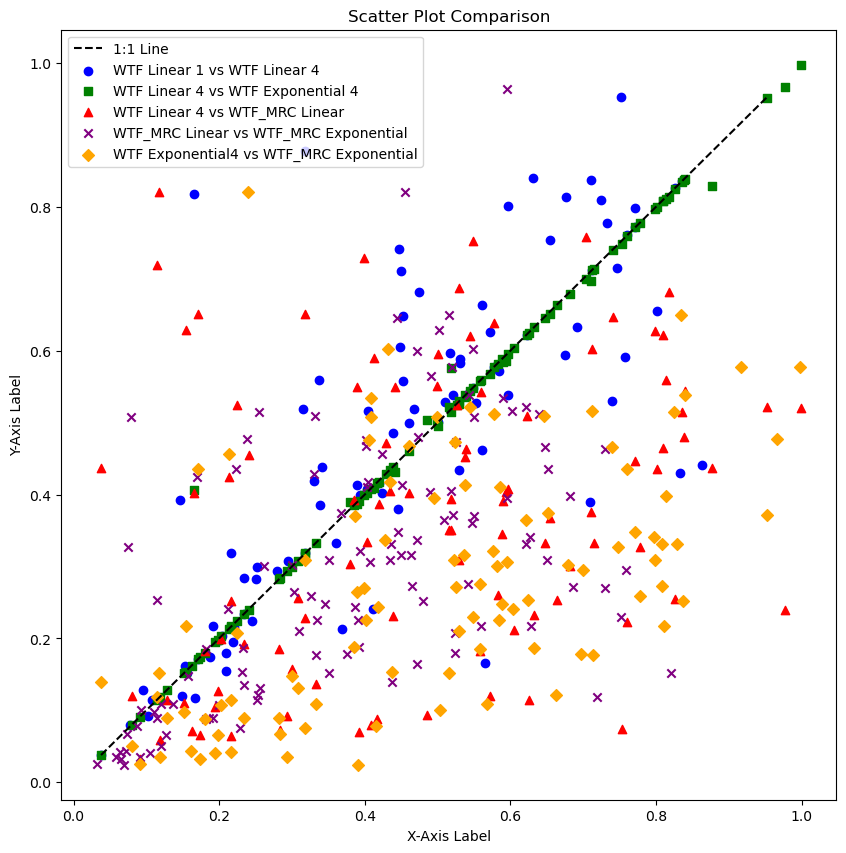

In [10]:
# Extract relevant columns using the column names
v1_l1 = df['WTF_Linear1'].values
v1_l4 = df['WTF_Linear4'].values
v1_ex4 = df['WTF_Exponential4'].values
v2_l1 = df['WTF_MRC_linear'].values
v2_exp = df['WTF_MRC_exponential'].values

# Prepare data by removing None/NaN values
def remove_nones(data1, data2):
    cleaned_data1, cleaned_data2 = [], []
    for x, y in zip(data1, data2):
        if not pd.isna(x) and not pd.isna(y):
            cleaned_data1.append(x)
            cleaned_data2.append(y)
    return cleaned_data1, cleaned_data2


# Clean data pairs independently
v1_l1_c, v1_l4_c = remove_nones(v1_l1, v1_l4)
v1_l1_ex4_c, v1_ex4_c = remove_nones(v1_l4, v1_ex4)
v1_l1_exp_c, v2_exp_c = remove_nones(v1_l4, v2_l1)
v1_l1_mrc_c, v2_l1_c = remove_nones(v2_l1, v2_exp)
v1_ex4_mrc_c, v2_exp_mrc_c = remove_nones(v1_ex4, v2_exp)

# Create figure
plt.figure(figsize=(10, 10))

# Plot the 1:1 line for the Linear1 vs Linear4 plot
plt.plot([min(v1_l1_c + v1_l4_c), max(v1_l1_c + v1_l4_c)], 
         [min(v1_l1_c + v1_l4_c), max(v1_l1_c + v1_l4_c)], 
         'k--', label='1:1 Line')

# Scatter plots for each pair
plt.scatter(v1_l1_c, v1_l4_c, label='WTF Linear 1 vs WTF Linear 4', color='blue', marker='o')
plt.scatter(v1_l1_ex4_c, v1_ex4_c, label='WTF Linear 4 vs WTF Exponential 4', color='green', marker='s')
plt.scatter(v1_l1_exp_c, v2_exp_c, label='WTF Linear 4 vs WTF_MRC Linear', color='red', marker='^')
plt.scatter(v1_l1_mrc_c, v2_l1_c, label='WTF_MRC Linear vs WTF_MRC Exponential', color='purple', marker='x')
plt.scatter(v1_ex4_mrc_c, v2_exp_mrc_c, label='WTF Exponential4 vs WTF_MRC Exponential', color='orange', marker='D')

# Add labels, legend, and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.legend()
plt.title('Scatter Plot Comparison')
# Save the plot as a PNG file
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/R2_plots.png', format='png', dpi=1000)
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Example functions and data setup (assuming you have v1_l1_c, v1_l4_c, etc.)
def linear_r2(x, y):
    x = np.array(x)  # Convert to NumPy array
    y = np.array(y)  # Convert to NumPy array
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    return r2_score(y, y_pred)

def exponential_r2(x, y):
    x = np.array(x)  # Convert to NumPy array
    y = np.array(y)  # Convert to NumPy array
    if np.any(y <= 0):  # Check for non-positive values
        raise ValueError("All values of y must be positive for the logarithmic transformation.")
    y_log = np.log(y)
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y_log)
    y_log_pred = model.predict(x.reshape(-1, 1))
    y_pred = np.exp(y_log_pred)
    return r2_score(y, y_pred)

# Calculate R^2 for each pair and model type
comparisons = [
    'WTF Linear1 vs WTF Linear4',
    'WTF Linear4 vs WTF Exponential4',
    'WTF Linear4 vs WTF_MRC Linear',
    'WTF MRC Linear vs WTF_MRC Exponential',
    'WTF Exponential4 vs WTF_MRC Exponential'
]

r2_results = {
    'Comparison': comparisons,
    'Linear Model R^2': [
        linear_r2(v1_l1_c, v1_l4_c),
        linear_r2(v1_l1_ex4_c, v1_ex4_c),
        linear_r2(v1_l1_exp_c, v2_exp_c),
        linear_r2(v1_l1_mrc_c, v2_l1_c),
        linear_r2(v1_ex4_mrc_c, v2_exp_mrc_c)
    ],
    'Exponential Model R^2': [
        exponential_r2(v1_l1_c, v1_l4_c),
        exponential_r2(v1_l1_ex4_c, v1_ex4_c),
        exponential_r2(v1_l1_exp_c, v2_exp_c),
        exponential_r2(v1_l1_mrc_c, v2_l1_c),
        exponential_r2(v1_ex4_mrc_c, v2_exp_mrc_c)
    ]
}

# Create DataFrame
df_r2_results = pd.DataFrame(r2_results)

# Display DataFrame
df_r2_results

,Comparison,Linear Model R^2,Exponential Model R^2
0,WTF Linear1 vs WTF Linear4,0.593541,0.422207
1,WTF Linear4 vs WTF Exponential4,0.988733,0.797695
2,WTF Linear4 vs WTF_MRC Linear,0.089238,-0.021509
3,WTF MRC Linear vs WTF_MRC Exponential,0.285977,0.036388
4,WTF Exponential4 vs WTF_MRC Exponential,0.271451,0.157861


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/all_variants1.csv')
df

,WTF_Linear1,WTF_Linear4,WTF_Exponential4,WTF_MRC_linear,WTF_MRC_exponential
0,0.321116,0.321116,0.321089,0.858573,0.035654
1,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.000000,1.000000,1.000000,0.449576,0.000000
3,1.000000,1.000000,1.000000,1.000000,0.455755
4,1.000000,1.000000,1.000000,0.543222,0.000000
...,...,...,...,...,...
119,0.219791,0.222365,0.222280,0.052722,0.006449
120,0.265478,0.295678,0.295633,0.074877,0.002861
121,0.196263,0.120463,0.119850,0.043725,0.005987
122,0.738630,0.738630,0.738436,0.000000,0.000000


In [4]:
df.describe()

,WTF_Linear1,WTF_Linear4,WTF_Exponential4,WTF_MRC_linear,WTF_MRC_exponential
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.858278,0.861316,0.861031,0.450938,0.042337
std,0.272292,0.262861,0.263002,0.377981,0.160501
min,0.124096,0.120463,0.119850,0.000000,0.000000
25%,0.941061,0.911874,0.910343,0.079688,0.000000
50%,1.000000,1.000000,1.000000,0.354634,0.000000
75%,1.000000,1.000000,1.000000,0.870386,0.000964
max,1.000000,1.000000,1.000000,1.000000,1.000000


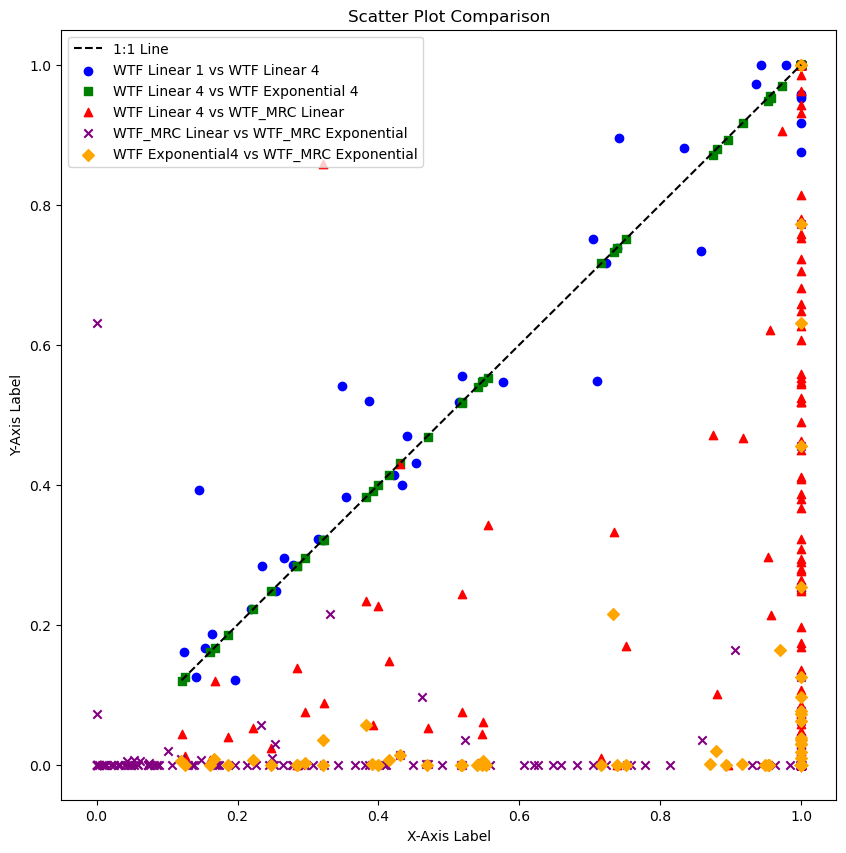

In [5]:
# Extract relevant columns using the column names
v1_l1 = df['WTF_Linear1'].values
v1_l4 = df['WTF_Linear4'].values
v1_ex4 = df['WTF_Exponential4'].values
v2_l1 = df['WTF_MRC_linear'].values
v2_exp = df['WTF_MRC_exponential'].values

# Prepare data by removing None/NaN values
def remove_nones(data1, data2):
    cleaned_data1, cleaned_data2 = [], []
    for x, y in zip(data1, data2):
        if not pd.isna(x) and not pd.isna(y):
            cleaned_data1.append(x)
            cleaned_data2.append(y)
    return cleaned_data1, cleaned_data2


# Clean data pairs independently
v1_l1_c, v1_l4_c = remove_nones(v1_l1, v1_l4)
v1_l1_ex4_c, v1_ex4_c = remove_nones(v1_l4, v1_ex4)
v1_l1_exp_c, v2_exp_c = remove_nones(v1_l4, v2_l1)
v1_l1_mrc_c, v2_l1_c = remove_nones(v2_l1, v2_exp)
v1_ex4_mrc_c, v2_exp_mrc_c = remove_nones(v1_ex4, v2_exp)

# Create figure
plt.figure(figsize=(10, 10))

# Plot the 1:1 line for the Linear1 vs Linear4 plot
plt.plot([min(v1_l1_c + v1_l4_c), max(v1_l1_c + v1_l4_c)], 
         [min(v1_l1_c + v1_l4_c), max(v1_l1_c + v1_l4_c)], 
         'k--', label='1:1 Line')

# Scatter plots for each pair
plt.scatter(v1_l1_c, v1_l4_c, label='WTF Linear 1 vs WTF Linear 4', color='blue', marker='o')
plt.scatter(v1_l1_ex4_c, v1_ex4_c, label='WTF Linear 4 vs WTF Exponential 4', color='green', marker='s')
plt.scatter(v1_l1_exp_c, v2_exp_c, label='WTF Linear 4 vs WTF_MRC Linear', color='red', marker='^')
plt.scatter(v1_l1_mrc_c, v2_l1_c, label='WTF_MRC Linear vs WTF_MRC Exponential', color='purple', marker='x')
plt.scatter(v1_ex4_mrc_c, v2_exp_mrc_c, label='WTF Exponential4 vs WTF_MRC Exponential', color='orange', marker='D')

# Add labels, legend, and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.legend()
plt.title('Scatter Plot Comparison')
# Save the plot as a PNG file
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/R2_plots1.png', format='png', dpi=1000)
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Example functions and data setup (assuming you have v1_l1_c, v1_l4_c, etc.)
def linear_r2(x, y):
    x = np.array(x)  # Convert to NumPy array
    y = np.array(y)  # Convert to NumPy array
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    y_pred = model.predict(x.reshape(-1, 1))
    return r2_score(y, y_pred)

def exponential_r2(x, y):
    x = np.array(x)  # Convert to NumPy array
    y = np.array(y)  # Convert to NumPy array
    if np.any(y <= 0):  # Check for non-positive values
        raise ValueError("All values of y must be positive for the logarithmic transformation.")
    y_log = np.log(y)
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y_log)
    y_log_pred = model.predict(x.reshape(-1, 1))
    y_pred = np.exp(y_log_pred)
    return r2_score(y, y_pred)

# Calculate R^2 for each pair and model type
comparisons = [
    'WTF Linear1 vs WTF Linear4',
    'WTF Linear4 vs WTF Exponential4',
    'WTF Linear4 vs WTF_MRC Linear',
    'WTF MRC Linear vs WTF_MRC Exponential',
    'WTF Exponential4 vs WTF_MRC Exponential'
]

r2_results = {
    'Comparison': comparisons,
    'Linear Model R^2': [
        linear_r2(v1_l1_c, v1_l4_c),
        linear_r2(v1_l1_ex4_c, v1_ex4_c),
        linear_r2(v1_l1_exp_c, v2_exp_c),
        linear_r2(v1_l1_mrc_c, v2_l1_c),
        linear_r2(v1_ex4_mrc_c, v2_exp_mrc_c)
    ],
    'Exponential Model R^2': [
        exponential_r2(v1_l1_c, v1_l4_c),
        exponential_r2(v1_l1_ex4_c, v1_ex4_c),
        exponential_r2(v1_l1_exp_c, v2_exp_c),
        exponential_r2(v1_l1_mrc_c, v2_l1_c),
        exponential_r2(v1_ex4_mrc_c, v2_exp_mrc_c)
    ]
}

# Create DataFrame
df_r2_results = pd.DataFrame(r2_results)

# Display DataFrame
df_r2_results

ValueError: All values of y must be positive for the logarithmic transformation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/wtf_res_Expon4a.csv')
df

,Unnamed: 0,ipiez,Piez,Pair,MnDate,MinVal_m,MxDate,MaxVal_m,DeltaT_days,Z0,Slope,PredZ_m,DeltaZ_m,Rech_mm,Prec_mm,#RainRecords,RechRate
0,1,1,34.32,1,01/04/2015,320.70,01/05/2015,349.00,31.000000,5.782337,-0.001438,310.365266,38.634734,1004.503082,30.8,31,32.613736
1,2,1,34.32,2,02/11/2015,322.60,30/05/2016,350.40,210.958333,5.790615,-0.000433,298.656135,51.743865,1345.340498,245.8,211,5.473314
2,3,1,34.32,3,07/09/2016,333.00,06/10/2016,350.05,30.000000,5.810974,-0.000544,328.538157,21.511843,559.307910,9.4,30,59.500841
3,4,1,34.32,4,10/11/2016,349.80,19/12/2016,350.05,40.000000,5.857362,-0.000020,349.514844,0.535156,13.914065,161.9,40,0.085942
4,5,1,34.32,5,16/01/2017,350.00,19/04/2017,350.15,93.958333,5.857933,-0.000005,349.832269,0.317731,8.260994,196.4,94,0.042062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,124,532.75,15,23/03/2018,146.55,13/07/2018,148.30,112.958333,4.987162,-0.000038,145.893367,2.406633,360.994991,NaN,0,NaN
4406,4407,124,532.75,16,19/06/2020,145.60,20/11/2020,145.96,155.041667,4.980802,-0.000016,145.229861,0.730139,109.520825,147.4,155,0.743018
4407,4408,124,532.75,17,18/12/2020,145.95,27/05/2021,148.23,160.958333,4.983264,-0.000002,145.892528,2.337472,350.620775,67.6,161,5.186698
4408,4409,124,532.75,18,31/05/2022,146.61,22/09/2022,146.66,115.000000,4.987463,-0.000023,146.185304,0.474696,71.204452,17.1,115,4.164003


In [7]:
import pandas as pd

def newcol(df):
    # Create 'Rech_co' column with RechRate values if they are between 0 and 1, otherwise leave empty
    df['Rech_co'] = df['RechRate'].where((df['RechRate'] > 0) & (df['RechRate'] < 1), '')

    # Create 'fil_P' column with Prec_mm values if RechRate is between 0 and 1
    df['fil_P'] = df['Prec_mm'].where((df['RechRate'] > 0) & (df['RechRate'] < 1), '')

    return df

df = newcol(df)
df


,Unnamed: 0,ipiez,Piez,Pair,MnDate,MinVal_m,MxDate,MaxVal_m,DeltaT_days,Z0,Slope,PredZ_m,DeltaZ_m,Rech_mm,Prec_mm,#RainRecords,RechRate,Rech_co,fil_P
0,1,1,34.32,1,01/04/2015,320.70,01/05/2015,349.00,31.000000,5.782337,-0.001438,310.365266,38.634734,1004.503082,30.8,31,32.613736,,
1,2,1,34.32,2,02/11/2015,322.60,30/05/2016,350.40,210.958333,5.790615,-0.000433,298.656135,51.743865,1345.340498,245.8,211,5.473314,,
2,3,1,34.32,3,07/09/2016,333.00,06/10/2016,350.05,30.000000,5.810974,-0.000544,328.538157,21.511843,559.307910,9.4,30,59.500841,,
3,4,1,34.32,4,10/11/2016,349.80,19/12/2016,350.05,40.000000,5.857362,-0.000020,349.514844,0.535156,13.914065,161.9,40,0.085942,0.085942,161.9
4,5,1,34.32,5,16/01/2017,350.00,19/04/2017,350.15,93.958333,5.857933,-0.000005,349.832269,0.317731,8.260994,196.4,94,0.042062,0.042062,196.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,124,532.75,15,23/03/2018,146.55,13/07/2018,148.30,112.958333,4.987162,-0.000038,145.893367,2.406633,360.994991,NaN,0,NaN,,
4406,4407,124,532.75,16,19/06/2020,145.60,20/11/2020,145.96,155.041667,4.980802,-0.000016,145.229861,0.730139,109.520825,147.4,155,0.743018,0.743018,147.4
4407,4408,124,532.75,17,18/12/2020,145.95,27/05/2021,148.23,160.958333,4.983264,-0.000002,145.892528,2.337472,350.620775,67.6,161,5.186698,,
4408,4409,124,532.75,18,31/05/2022,146.61,22/09/2022,146.66,115.000000,4.987463,-0.000023,146.185304,0.474696,71.204452,17.1,115,4.164003,,


In [6]:
#df.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/expon4.csv')

In [8]:
unique_boreholes = df['Piez'].unique().tolist()
df['fil_P'] = pd.to_numeric(df['fil_P'], errors='coerce')
df['Rech_co'] = pd.to_numeric(df['Rech_co'], errors='coerce')

def processRech(df, borehole):
    bh_filt = df.loc[df['Piez'] == borehole].copy()

    # Calculate the sum of precipitation ('fil_P')
    sum_rain = bh_filt['fil_P'].sum()

    # Calculate the median of the recharge coefficient ('Rech_co')
    median_rech = bh_filt['Rech_co'].median()

    return {
        'borehole_name': borehole,
        'Total precipitation': sum_rain,
        'Median Rech co':median_rech
    }

# Initialize an empty list to store all results
all_results1 = []

for borehole in unique_boreholes:
    result = processRech(df, borehole)  # Call the function and get result
    all_results1.append(result)  # Append the result to the list

# Convert the list of results to a DataFrame
results_df1 = pd.DataFrame(all_results1)

# Display the results DataFrame
print(results_df1)



     borehole_name  Total precipitation  Median Rech co
0           34.320               1813.7        0.224408
1          219.300                  0.0             NaN
2          228.520                864.8        0.771858
3          229.278                355.8        0.213221
4          229.285                182.7        0.318032
..             ...                  ...             ...
119        524.500               3422.6        0.173903
120        524.510               6381.6        0.152262
121        524.820               2525.8        0.118769
122        532.153                261.3        0.401789
123        532.750               2991.8        0.416055

[124 rows x 3 columns]


In [9]:
results_df1.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/medan_Total_P.csv')

In [1]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

df1=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/precip_XX.csv')
df1

,Piez,MnDate,MxDate,fil_P
0,34.32,01/04/2015,01/05/2015,NaN
1,34.32,02/11/2015,30/05/2016,NaN
2,34.32,07/09/2016,06/10/2016,NaN
3,34.32,10/11/2016,19/12/2016,161.9
4,34.32,16/01/2017,19/04/2017,196.4
...,...,...,...,...
4405,532.75,23/03/2018,13/07/2018,NaN
4406,532.75,19/06/2020,20/11/2020,147.4
4407,532.75,18/12/2020,27/05/2021,NaN
4408,532.75,31/05/2022,22/09/2022,NaN


In [3]:
import pandas as pd

# Sample DataFrame df1 definition here
# df1 = pd.read_csv('your_file.csv') # For example

# Get unique boreholes
unique_boreholes = df1['Piez'].unique().tolist()

# Initialize an empty list to store results
results = []

# Process each borehole
for borehole in unique_boreholes:
    # Filter DataFrame for the specific borehole
    df = df1.loc[df1['Piez'] == borehole].copy()
    
    # Convert date strings to datetime
    df['MnDate'] = pd.to_datetime(df['MnDate'], format='%d/%m/%Y')
    df['MxDate'] = pd.to_datetime(df['MxDate'], format='%d/%m/%Y')
    
    # Melt the DataFrame to combine MnDate and MxDate into one column
    df_melted = pd.melt(df, id_vars=['Piez', 'fil_P'], value_vars=['MnDate', 'MxDate'], var_name='DateType', value_name='Date')
    
    # Sort by Date
    df_melted_sorted = df_melted.sort_values(by='Date').reset_index(drop=True)
    
    # Move the fil_P values to the corresponding MnDate
    df_melted_sorted['fil_P'] = df_melted_sorted.apply(lambda row: row['fil_P'] if row['DateType'] == 'MnDate' else None, axis=1)
    
    # Drop the DateType column as it's no longer needed
    df_final = df_melted_sorted.drop(columns=['DateType'])
    
    # Define the function to calculate the hydrologic year
    def hydrologic_year(date):
        year = date.year
        if date.month >= 10:  # If the month is October (10) or later
            return f"{year}/{year + 1}"
        else:
            return f"{year - 1}/{year}"
    
    # Apply the hydrologic year function to create a new column in the DataFrame
    df_final['HydrologicYear'] = df_final['Date'].apply(hydrologic_year)
    
    # Filter out rows where 'fil_P' is NaN
    df_final_filtered = df_final.dropna(subset=['fil_P'])
    
    # Get the data grouped by HydrologicYear and sum the precipitation values
    grouped = df_final_filtered.groupby('HydrologicYear')['fil_P'].sum().reset_index()
    
    # Calculate the average annual precipitation for this borehole
    average_precipitation = grouped['fil_P'].mean()
    
    # Append the result to the results list
    results.append({'Borehole': borehole, 'AverageAnnualPrecipitation': average_precipitation})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the final DataFrame with borehole and average annual precipitation
print(results_df)


     Borehole  AverageAnnualPrecipitation
0      34.320                  259.100000
1     219.300                         NaN
2     228.520                  288.266667
3     229.278                  177.900000
4     229.285                   91.350000
..        ...                         ...
119   524.500                  285.216667
120   524.510                  455.828571
121   524.820                  841.933333
122   532.153                  130.650000
123   532.750                  498.633333

[124 rows x 2 columns]


In [4]:
results_df.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/average_Ann_P.csv')

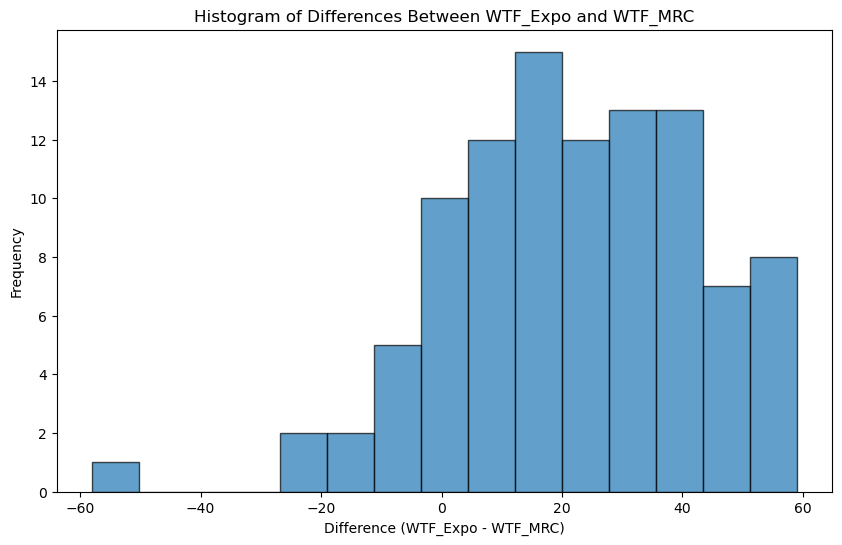

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Manually extracting the difference values from the image provided by the user
differences = [
    2, 42, -24, 1, 52, 49, 46, 3, -1, 50, 20, 18, 0, 27, 20, 2, 32, 52, 24, 9,
    19, 40, -4, 12, 12, 5, 46, 22, 48, 59, 21, 10, 25, 30, 54, 28, 28, 58, 37,
    29, 13, 42, 36, -10, 7, 14, -17, 19, 7, 31, -26, 54, 28, 13, 32, 13, 32,
    54, 26, 17, 59, 15, 9, 15, 37, -6, 36, 28, 22, -58, 2, 26, 18, 10, 2, 37,
    42, 38, 10, 42, -10, 36, 34, 25, 15, 45, 49, -7, -1, 17, 34, -13, 4, 22, 
    40, 14, 5, 8, 18, 34
]

# Plotting the histogram of differences
plt.figure(figsize=(10, 6))
plt.hist(differences, bins=15, edgecolor='black', alpha=0.7)
plt.title('Histogram of Differences Between WTF_Expo and WTF_MRC')
plt.xlabel('Difference (WTF_Expo - WTF_MRC)')
plt.ylabel('Frequency')
#plt.grid(True)
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/recharge/diff.png', format='png', dpi=1000)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/water_level.csv')
df

,borehole_name,lon,lat,water_level
0,219/3,-8.408356,40.330776,57.888762
1,228/52,-8.712300,40.294612,70.842479
2,229/278,-8.666582,40.243392,71.182619
3,229/285,-8.666855,40.256900,80.173000
4,250/37,-8.694515,40.106526,88.403269
...,...,...,...,...
143,607/874,-7.799510,37.116778,93.644146
144,608/365,-7.698113,37.134254,46.701489
145,608/367,-7.697982,37.134890,42.517890
146,608/437,-7.721542,37.130283,69.242500


C:\Users\35191\AppData\Local\Temp\ipykernel_24264\1518149177.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(pd.cut(df['water_level'], bins=bins))


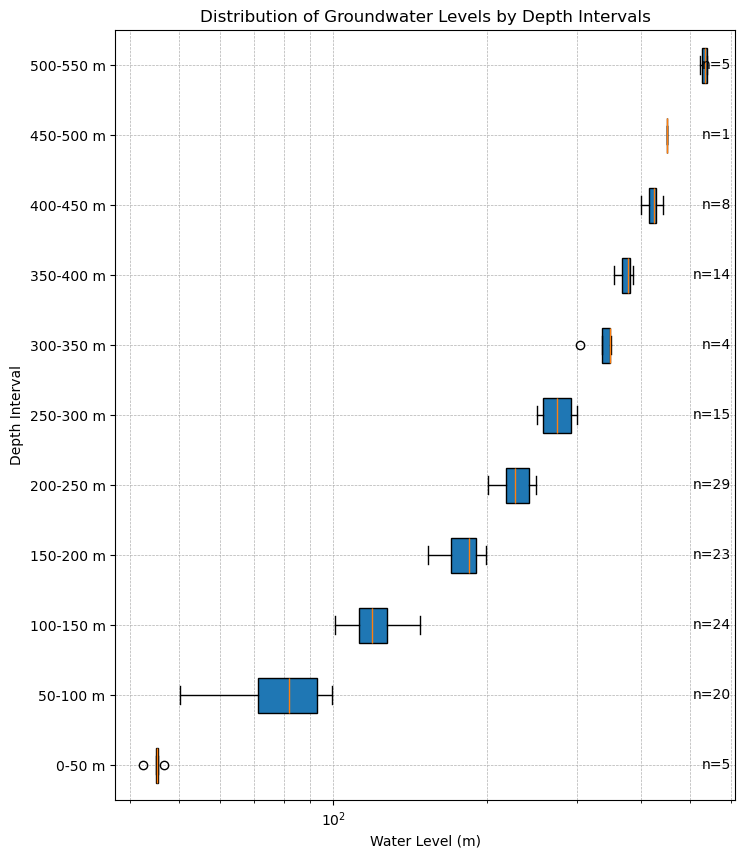

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'water_level' and 'depth' columns

# Define depth intervals (modify bins as needed)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]  # Example depth intervals, you can modify these
grouped_data = df.groupby(pd.cut(df['water_level'], bins=bins))

# Manually generate the data for the horizontal box plot from the 'water_level' column
boxplot_data = [group['water_level'] for _, group in grouped_data]

# Calculate the number of data points in each bin
data_counts = grouped_data.size().values[::-1]  # Reverse to match the depth order

# Reverse the order of the intervals to match depth convention (deepest at bottom)
boxplot_data = boxplot_data[::-1]
depth_labels = [f"{int(interval.left)}-{int(interval.right)} m" for interval in grouped_data.groups][::-1]

# Create the boxplot with depth on the Y-axis
plt.figure(figsize=(8, 10))
boxplot = plt.boxplot(boxplot_data, vert=False, labels=depth_labels, patch_artist=True)

# Set log scale for X-axis
plt.xscale('log')

# Labels and title
plt.xlabel('Water Level (m)')
plt.ylabel('Depth Interval')
plt.title('Distribution of Groundwater Levels by Depth Intervals')

# Reverse Y-axis to match typical depth convention (0 at top, increasing downwards)
plt.gca().invert_yaxis()

# Adjust grid style
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Annotate the data counts on the right side of the plot
for i, count in enumerate(data_counts):
    plt.text(plt.gca().get_xlim()[1] * 0.98, i + 1, f"n={count}", va='center', ha='right')
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/box_plot.png', format='png', dpi=1000)
plt.show()


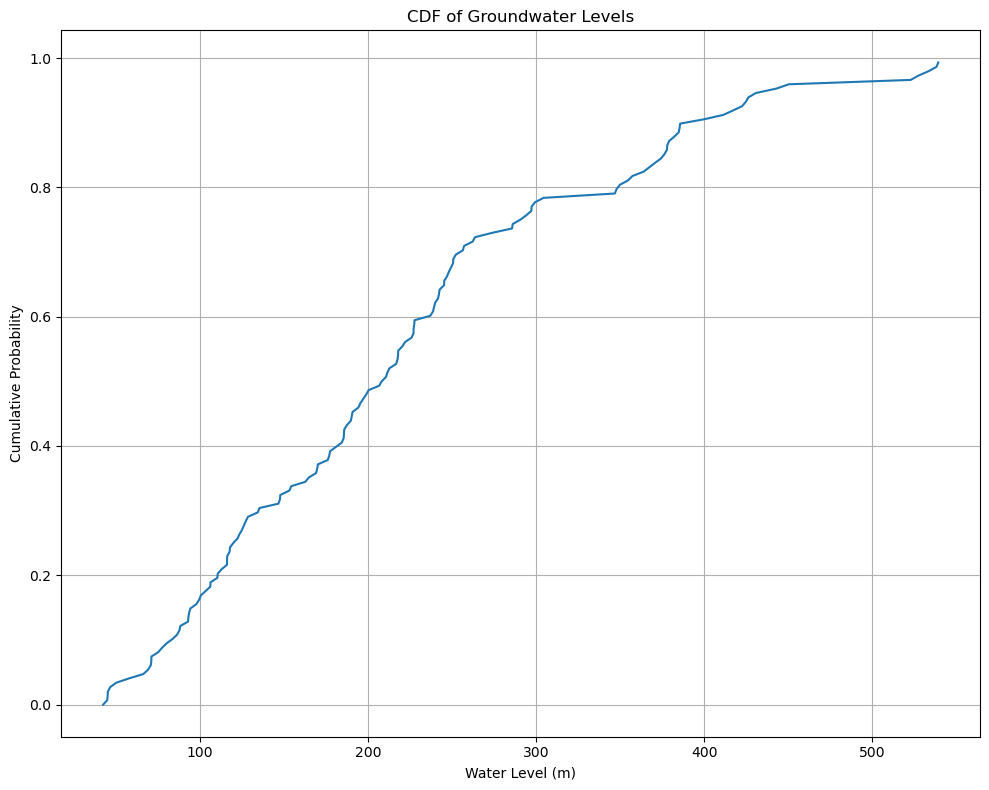

In [11]:
# Plotting the boxplot for water levels
plt.figure(figsize=(10, 8))

# CDF Plot
sorted_data = np.sort(df['water_level'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, cdf, label='Water Level CDF')
plt.title('CDF of Groundwater Levels')
plt.xlabel('Water Level (m)')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.tight_layout()
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/cdf_plot.png', format='png', dpi=1000)
plt.show()


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [22]:
df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/downloaded_borehole.csv', low_memory=False)
df

,DATA,34/32,41/N1,63/N1,69/N1,74/N1,98/N2,104/N2,113/N1,114/N1,...,559/25,562/19,567/11,573/15,581/41,585/78,587/1,587/101,587/19,587/7
0,01/11/1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/12/1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/02/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/03/1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181031,01/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.35,138.03
181032,22/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181033,23/02/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Convert the 'DATA' column to datetime
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y', errors='coerce')

# Convert all other columns to numeric, forcing non-convertible values to NaN
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Split the data into two periods
df_period1 = df[(df['DATA'] >= '1978-01-01') & (df['DATA'] <= '2004-12-31')]
df_period2 = df[(df['DATA'] >= '2005-01-01') & (df['DATA'] <= '2024-12-31')]

# Calculate the average water level for each borehole in each period
#average_period1 = df_period1.mean(numeric_only=True)
#average_period2 = df_period2.mean(numeric_only=True)

average_period1 = df_period1.iloc[:, 1:].mean()  # Mean is computed per borehole, ignoring NaNs
average_period2 = df_period2.iloc[:, 1:].mean()

# Reindex the averages to include all original borehole columns, filling missing values with NaN
#average_period1 = average_period1.reindex(df.columns[1:], fill_value=pd.NA)
#average_period2 = average_period2.reindex(df.columns[1:], fill_value=pd.NA)

# Combine the averages into a new DataFrame
average_df = pd.DataFrame({
    'Borehole': df.columns[1:],
    'Average_Period1': average_period1.values,
    'Average_Period2': average_period2.values
})

# Display the resulting DataFrame with the averages
print("Average Water Levels per Borehole:")
print(average_df)


Average Water Levels per Borehole:
    Borehole Average_Period1 Average_Period2
0      34/32             NaN      347.834536
1      41/N1             NaN      158.975145
2      63/N1             NaN      338.808782
3      69/N1             NaN        78.69578
4      74/N1             NaN      866.478759
..       ...             ...             ...
328   585/78      507.269714      507.323214
329    587/1      126.846287      127.771017
330  587/101        134.9695             NaN
331   587/19      210.244322      199.302375
332    587/7      146.126875      134.341923

[333 rows x 3 columns]


In [24]:
#average_df.to_csv('C:/Users/35191/Desktop/ThesisData/piezometers/water_trend2.csv')

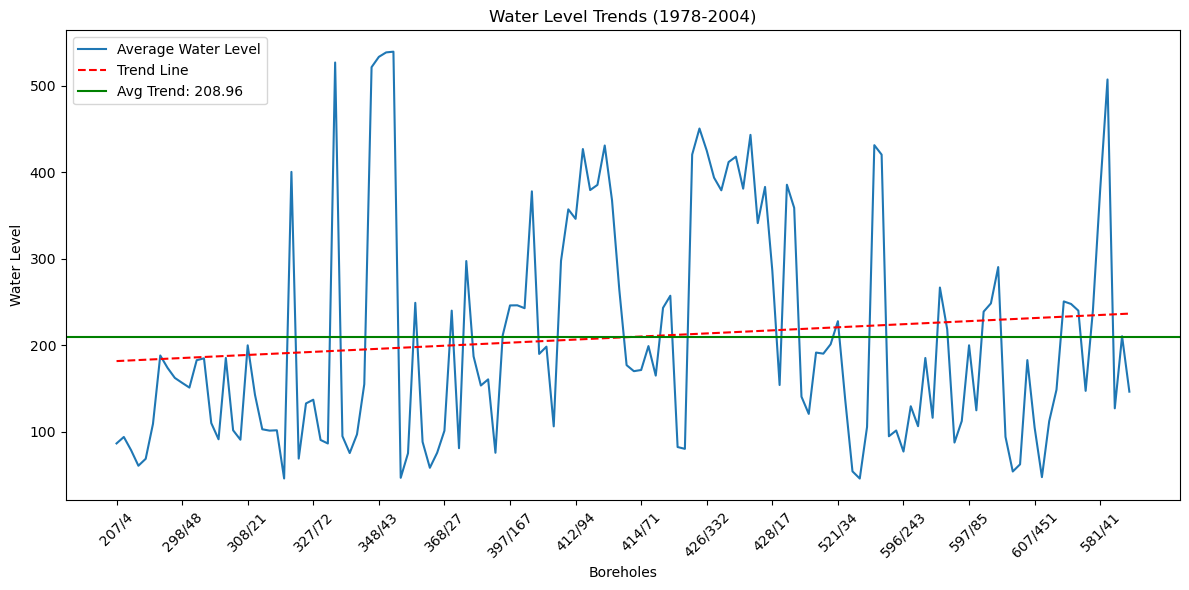

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
average_df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/water_trend2.csv', low_memory=False)


# Drop rows where 'Average_Period1' is NaN
filtered_df = average_df.dropna(subset=['AP1'])

# Ensure Y is numeric
Y = pd.to_numeric(filtered_df['AP1'], errors='coerce')

# Create an index-based X for fitting the trend line
X = np.arange(len(filtered_df))

# Fit a line (trend line) through the data
z = np.polyfit(X, Y, 1)  # 1st degree polynomial (linear)
p = np.poly1d(z)

# Plotting the data points
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Borehole'], Y, label='Average Water Level', linestyle='-')

# Plotting the trend line
plt.plot(filtered_df['Borehole'], p(X), "r--", label='Trend Line')

# Calculate and plot the average value of the trend line
mean_trend1 = p(X).mean()  # Use 'p' which corresponds to the current trend line
plt.axhline(y=mean_trend1, color='g', linestyle='-', label=f'Avg Trend: {mean_trend1:.2f}')


# Customize the x-axis labels to show only 5 intervals
interval = max(1, len(filtered_df) // 15)  # Determine interval to get approximately 5 labels
plt.xticks(ticks=np.arange(0, len(filtered_df), interval), labels=filtered_df['Borehole'][::interval])

plt.title('Water Level Trends (1978-2004)')
plt.xlabel('Boreholes')
plt.ylabel('Water Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/Trend1_plot.png', format='png', dpi=2000)
plt.show()


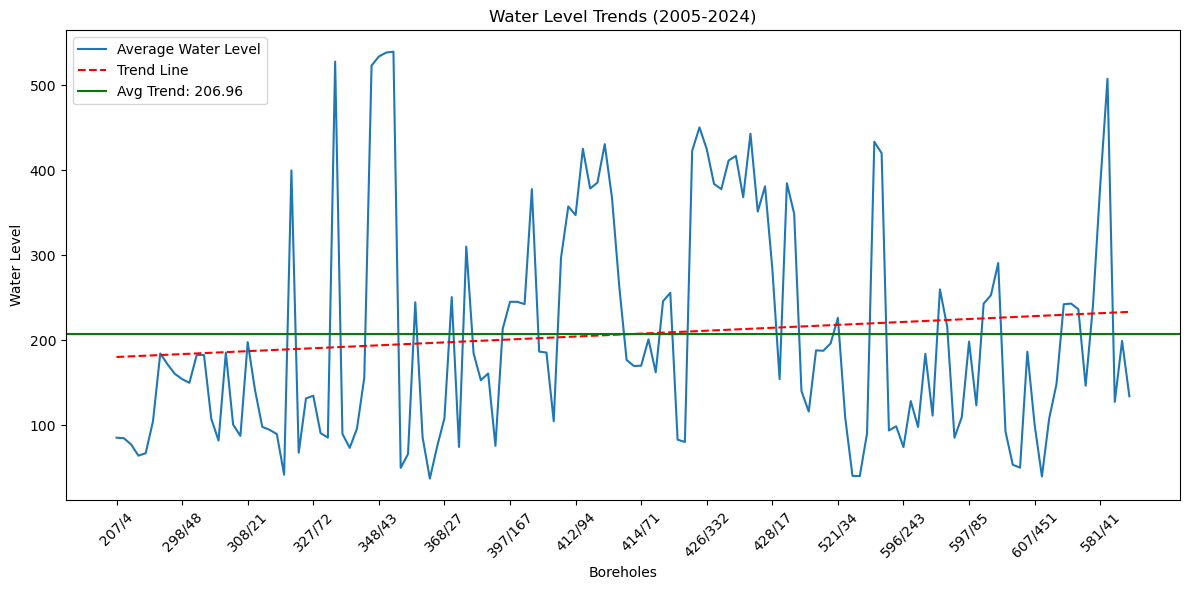

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Drop rows where 'Average_Period1' is NaN
filtere_df = average_df.dropna(subset=['AP2'])

# Ensure Y is numeric
Ya = pd.to_numeric(filtere_df['AP2'], errors='coerce')

# Create an index-based X for fitting the trend line
Xa = np.arange(len(filtere_df))

# Fit a line (trend line) through the data
z = np.polyfit(Xa, Ya, 1)  # 1st degree polynomial (linear)
p = np.poly1d(z)

# Plotting the data points
plt.figure(figsize=(12, 6))
plt.plot(filtere_df['Borehole'], Ya, label='Average Water Level', linestyle='-')

# Plotting the trend line
plt.plot(filtere_df['Borehole'], p(Xa), "r--", label='Trend Line')

# Calculate and plot the average value of the trend line
mean_trend1 = p(X).mean()  # Use 'p' which corresponds to the current trend line
plt.axhline(y=mean_trend1, color='g', linestyle='-', label=f'Avg Trend: {mean_trend1:.2f}')


# Customize the x-axis labels to show only 5 intervals
interval = max(1, len(filtere_df) // 15)  # Determine interval to get approximately 5 labels
plt.xticks(ticks=np.arange(0, len(filtere_df), interval), labels=filtere_df['Borehole'][::interval])

plt.title('Water Level Trends (2005-2024)')
plt.xlabel('Boreholes')
plt.ylabel('Water Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/Trend2_plot.png', format='png', dpi=2000)
plt.show()

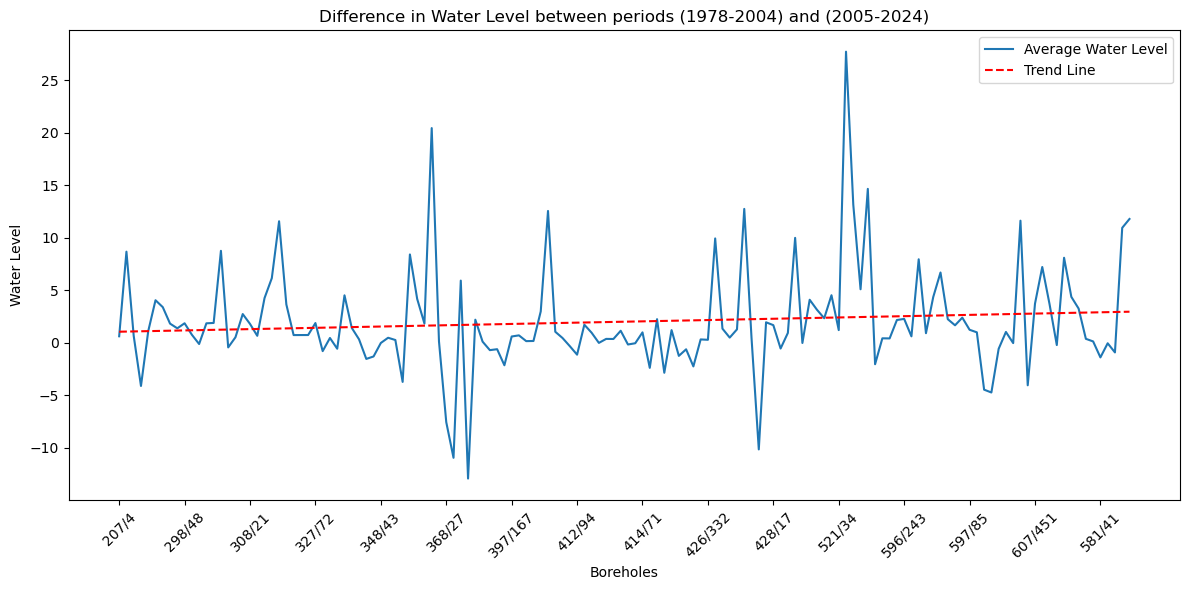

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Drop rows where 'Average_Period1' is NaN
filtere_df = average_df.dropna(subset=['Difference'])

# Ensure Y is numeric
Y = pd.to_numeric(filtere_df['Difference'], errors='coerce')

# Create an index-based X for fitting the trend line
X = np.arange(len(filtere_df))

# Fit a line (trend line) through the data
z = np.polyfit(X, Y, 1)  # 1st degree polynomial (linear)
p = np.poly1d(z)

# Plotting the data points
plt.figure(figsize=(12, 6))
plt.plot(filtere_df['Borehole'], Y, label='Average Water Level', linestyle='-')

# Plotting the trend line
plt.plot(filtere_df['Borehole'], p(X), "r--", label='Trend Line')

# Customize the x-axis labels to show only 5 intervals
interval = max(1, len(filtere_df) // 15)  # Determine interval to get approximately 5 labels
plt.xticks(ticks=np.arange(0, len(filtere_df), interval), labels=filtere_df['Borehole'][::interval])

plt.title('Difference in Water Level between periods (1978-2004) and (2005-2024)')
plt.xlabel('Boreholes')
plt.ylabel('Water Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/Trend3_plot.png', format='png', dpi=2000)
plt.show()

In [6]:
import pandas as pd
import matplotlib as plt
df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/water_level2.csv')
df

,borehole,lon,lat,water_level
0,34/32,257078.00,531049.00,347.834536
1,41/N1,167211.00,528865.00,158.975144
2,63/N1,285155.00,514613.00,338.808782
3,69/N1,162493.00,503742.00,78.695780
4,74/N1,235233.00,501889.00,866.478759
...,...,...,...,...
328,585/78,162080.78,39797.68,507.307479
329,587/1,184330.00,32770.00,127.087699
330,587/101,190150.00,37800.00,134.969500
331,587/19,194650.00,30830.00,205.823333


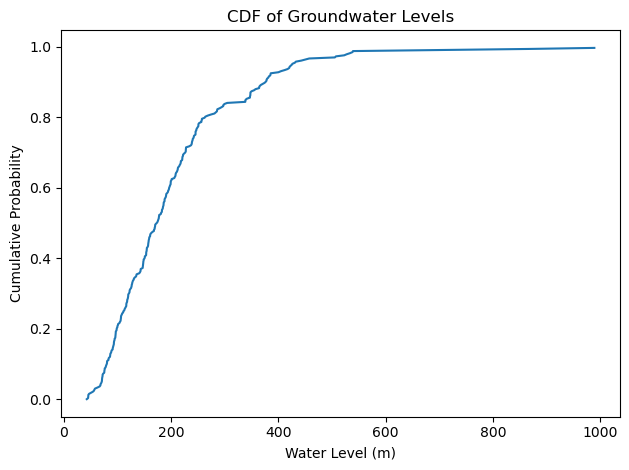

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# CDF Plot
sorted_data = np.sort(df['water_level'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, cdf, label='Water Level CDF')

# Plot details
plt.title('CDF of Groundwater Levels')
plt.xlabel('Water Level (m)')
plt.ylabel('Cumulative Probability')
#plt.grid(True)

plt.tight_layout()
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/cdf_plot.png', format='png', dpi=3000)
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('C:/Users/35191/Desktop/ThesisData/piezometers/all_method.csv')
df

,WTF-lin2a,WTF-lin4a,WTF-exp4a,MRC-lin_a,MRC-exp_a,WTF-lin2b,WTF-lin4b,WTF-exp4b,MRC-lin_b,MRC-exp_b
0,0.245159,0.224572,0.224408,0.524100,0.207335,0.321116,0.321116,0.321089,0.858573,0.035654
1,0.771889,0.771889,0.771858,0.445969,0.347334,1.000000,1.000000,1.000000,0.449576,0.000000
2,0.368213,0.213489,0.213221,0.424135,0.455755,1.000000,1.000000,1.000000,1.000000,0.455755
3,0.318106,0.318106,0.318032,0.650371,0.309669,1.000000,1.000000,1.000000,0.543222,0.000000
4,0.449567,0.711232,0.696956,0.375976,0.178725,1.000000,0.952480,0.948887,0.296266,0.000000
...,...,...,...,...,...,...,...,...,...,...
90,0.187165,0.173944,0.173903,0.065713,0.031761,0.219791,0.222365,0.222280,0.052722,0.006449
91,0.156391,0.152342,0.152262,0.110366,0.098250,0.265478,0.295678,0.295633,0.074877,0.002861
92,0.149340,0.119252,0.118769,0.058731,0.035772,0.196263,0.120463,0.119850,0.043725,0.005987
93,0.424304,0.402571,0.401789,0.334088,0.226055,0.738630,0.738630,0.738436,0.000000,0.000000


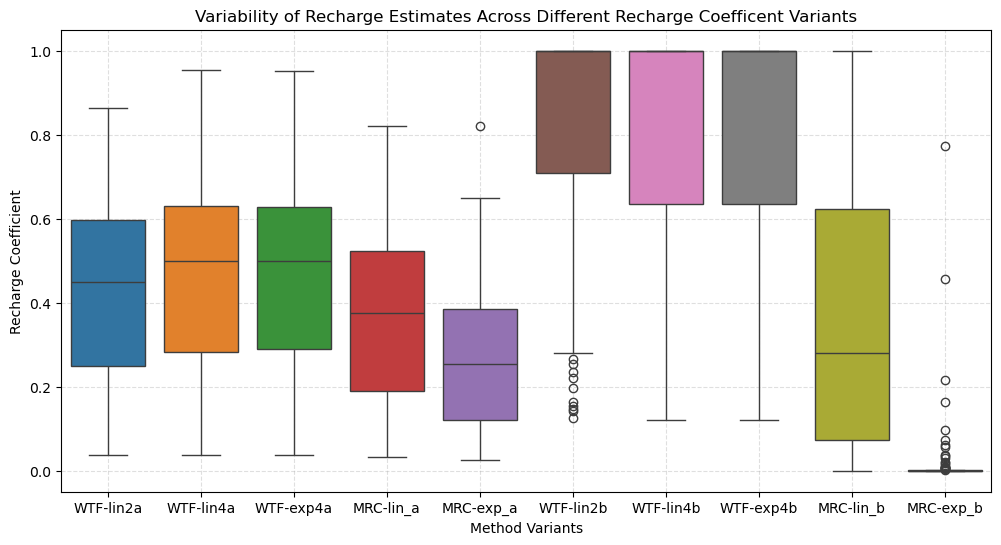

In [8]:
# Plotting boxplots to visualize the variability among the variants
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Variability of Recharge Estimates Across Different Recharge Coefficent Variants')
plt.ylabel('Recharge Coefficient')
plt.xlabel('Method Variants')
plt.grid(True, linestyle='--', alpha=0.4)
#plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/rech_methods.png', format='png', dpi=3000)
plt.show()

C:\Users\35191\AppData\Local\Temp\ipykernel_27348\1639567103.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df, inner="quartile", scale="width")


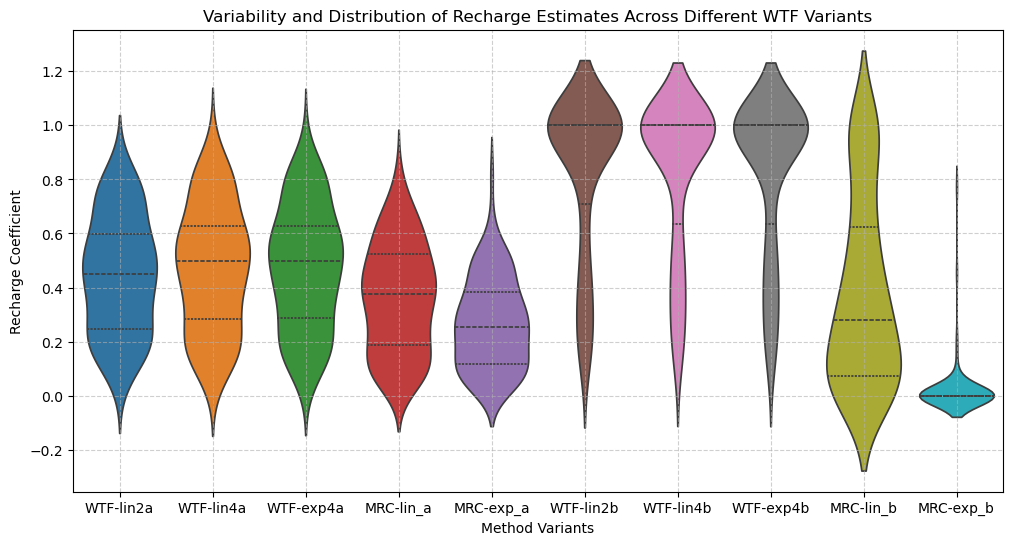

In [9]:
# Plotting violin plots to visualize the variability and distribution among the variants
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, inner="quartile", scale="width")
plt.title('Variability and Distribution of Recharge Estimates Across Different WTF Variants')
plt.ylabel('Recharge Coefficient')
plt.xlabel('Method Variants')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

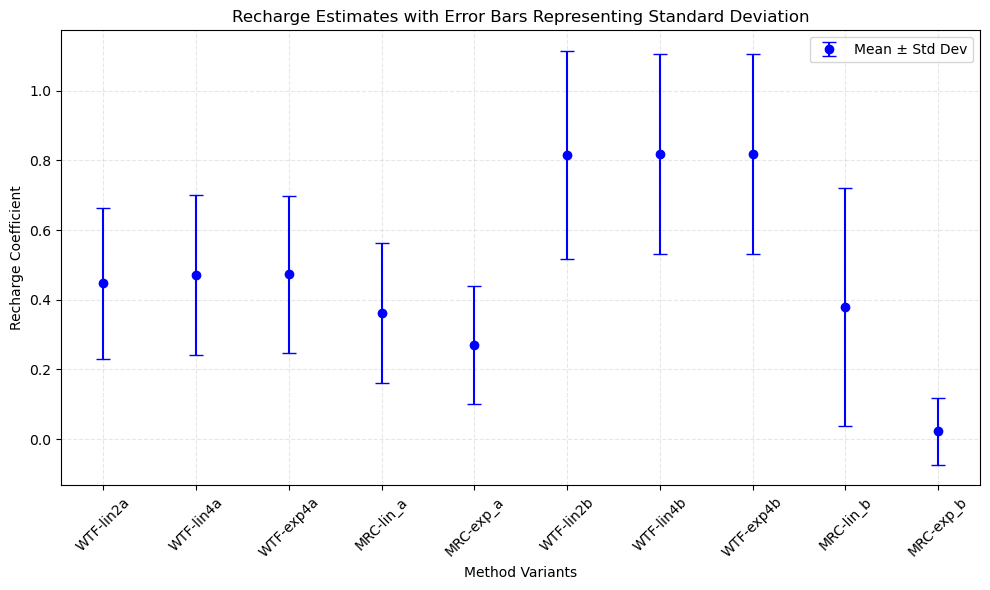

In [14]:

# Calculate mean and standard deviation for each variant
means = df.mean()
stds = df.std()

# Define the x positions for the groups
x_pos = np.arange(len(means))

# Plotting the error bars
plt.figure(figsize=(10, 6))
plt.errorbar(x_pos, means, yerr=stds, fmt='o', capsize=5, linestyle='None', color='blue', label='Mean ± Std Dev')

# Setting the labels
plt.xticks(x_pos, df.columns, rotation=45)
plt.xlabel('Method Variants')
plt.ylabel('Recharge Coefficient')
plt.title('Recharge Estimates with Error Bars Representing Standard Deviation')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/error_bar_methods.png', format='png', dpi=3000)
plt.show()

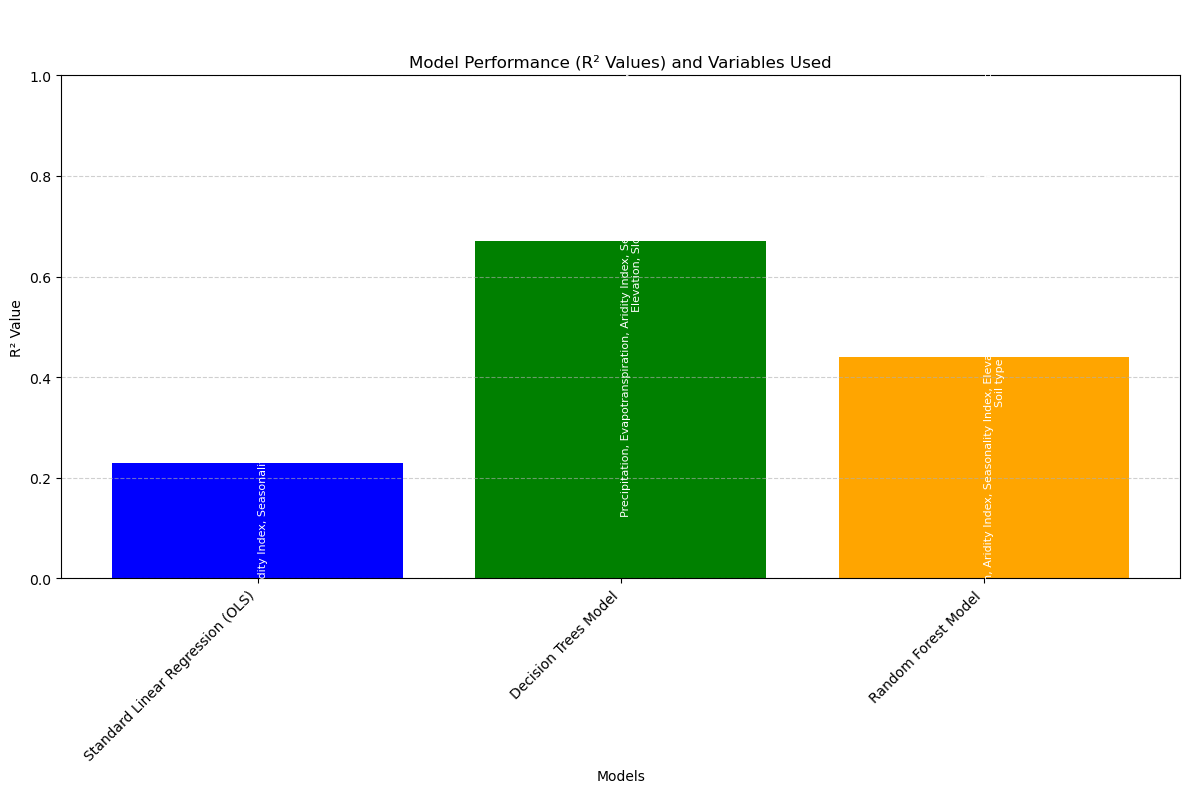

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the DataFrame based on the provided data
data = {
    'Model': ['Standard Linear Regression (OLS)', 'Decision Trees Model', 'Random Forest Model'],
    'R2': [0.23, 0.67, 0.44],
    'Variables': [
        'Precipitation, Evapotranspiration, Aridity Index, Seasonality Index, Percent sand, Percent silt, Percent clay',
        'Precipitation, Evapotranspiration, Aridity Index, Seasonality Index, Percent clay, Soil type, Elevation, Slope',
        'Precipitation, Evapotranspiration, Aridity Index, Seasonality Index, Elevation, Slope, Percent clay, Percent silt, Percent sand, Land use, Soil type'
    ]
}

df = pd.DataFrame(data)

# Plotting the bar plot for R² values
plt.figure(figsize=(12, 8))
bars = plt.bar(df['Model'], df['R2'], color=['blue', 'green', 'orange'])

# Adding text annotations for variables
for bar, variables in zip(bars, df['Variables']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, variables,
             ha='center', va='top', fontsize=8, color='white', rotation=90, wrap=True)

plt.title('Model Performance (R² Values) and Variables Used')
plt.xlabel('Models')
plt.ylabel('R² Value')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for better visualization of R² values
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


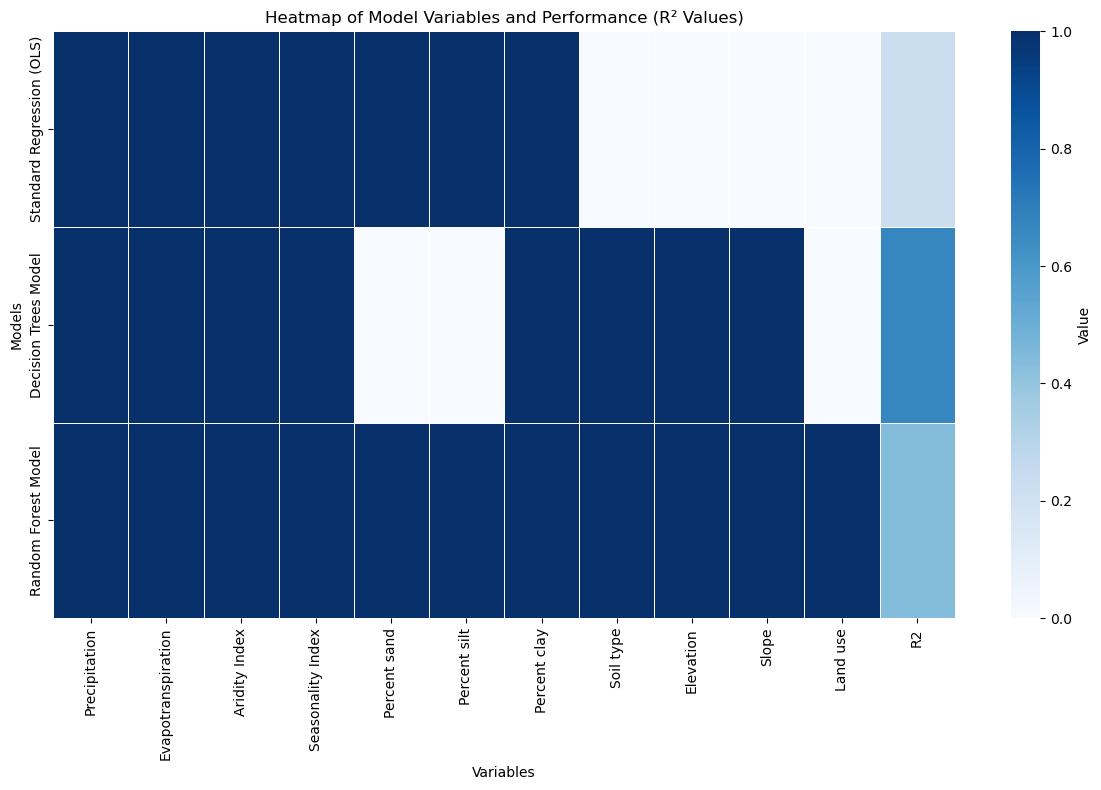

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating the DataFrame based on the provided data for the heatmap
data = {
    'Model': ['Standard Regression (OLS)', 'Decision Trees Model', 'Random Forest Model'],
    'Precipitation': [1, 1, 1],
    'Evapotranspiration': [1, 1, 1],
    'Aridity Index': [1, 1, 1],
    'Seasonality Index': [1, 1, 1],
    'Percent sand': [1, 0, 1],
    'Percent silt': [1, 0, 1],
    'Percent clay': [1, 1, 1],
    'Soil type': [0, 1, 1],
    'Elevation': [0, 1, 1],
    'Slope': [0, 1, 1],
    'Land use': [0, 0, 1],
    'R2': [0.23, 0.67, 0.44]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Creating a heatmap to visualize the presence (1) or absence (0) of each variable in the models and the R² values
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=False, cmap='Blues', cbar_kws={'label': 'Value'}, linewidths=.5)
plt.title('Heatmap of Model Variables and Performance (R² Values)')
plt.xlabel('Variables')
plt.ylabel('Models')
plt.tight_layout()
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/heat_map.png', format='png', dpi=3000)
plt.show()


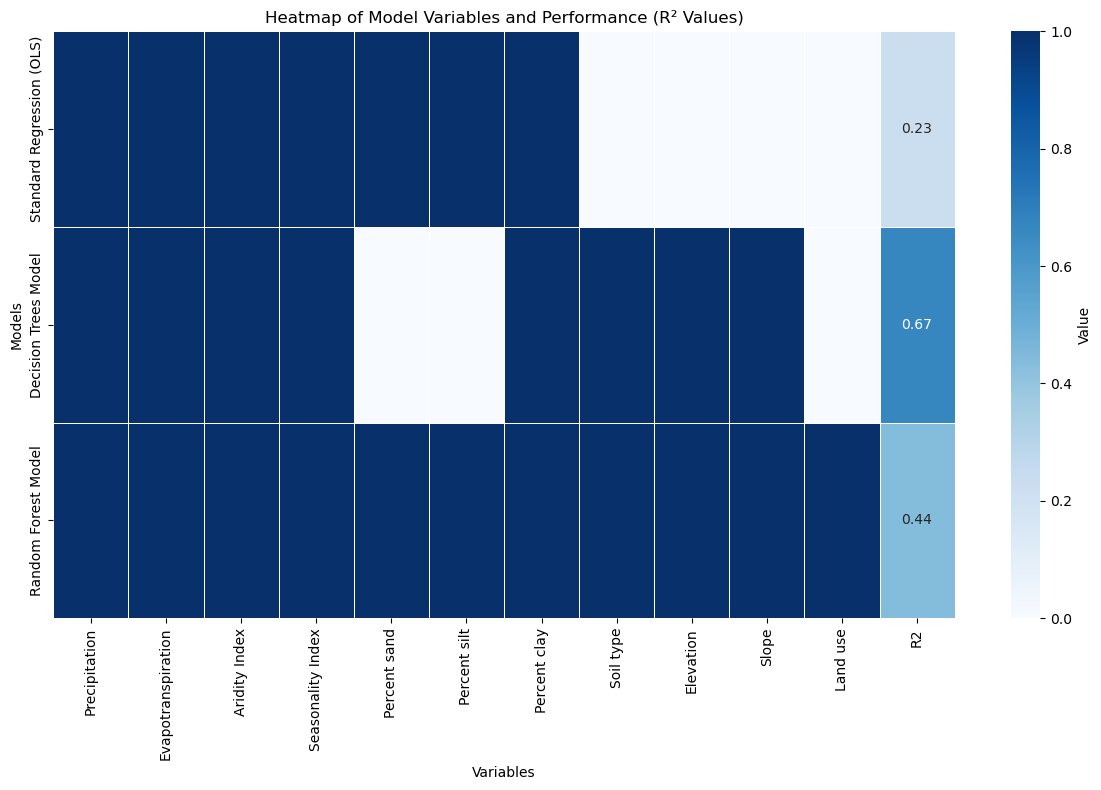

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Creating the DataFrame based on the provided data for the heatmap
data = {
    'Model': ['Standard Regression (OLS)', 'Decision Trees Model', 'Random Forest Model'],
    'Precipitation': [1, 1, 1],
    'Evapotranspiration': [1, 1, 1],
    'Aridity Index': [1, 1, 1],
    'Seasonality Index': [1, 1, 1],
    'Percent sand': [1, 0, 1],
    'Percent silt': [1, 0, 1],
    'Percent clay': [1, 1, 1],
    'Soil type': [0, 1, 1],
    'Elevation': [0, 1, 1],
    'Slope': [0, 1, 1],
    'Land use': [0, 0, 1],
    'R2': [0.23, 0.67, 0.44]
}

# Creating the DataFrame
df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Creating a mask to annotate only the R² values
annot = df.astype(str).values
mask = np.ones_like(df, dtype=bool)
mask[:, -1] = False  # Allow annotation only for the R2 column

# Creating a heatmap to visualize the presence (1) or absence (0) of each variable in the models and the R² values
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=np.where(mask, "", annot), fmt='', cmap='Blues', cbar_kws={'label': 'Value'}, linewidths=.5)
plt.title('Heatmap of Model Variables and Performance (R² Values)')
plt.xlabel('Variables')
plt.ylabel('Models')
plt.tight_layout()
plt.savefig('C:/Users/35191/Desktop/ThesisData/piezometers/heat_map.png', format='png', dpi=3000)
plt.show()
